In [145]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [146]:
# plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})
plt.rcParams.update({'font.size':20})

In [147]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [148]:
import pandas as pd
import os

In [149]:
import phenom

In [150]:
import lal

In [151]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [152]:
import pycbc.types
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pycbc.waveform.utils

In [153]:
import workflow_utils
import analysis_utils

In [154]:
import gpm_utils

# load data

In [155]:
# data_dict = workflow_utils.load_nr_data()
nr_data = workflow_utils.load_nr_data()

In [156]:
nr_data['times'][0]

-775.0

In [157]:
nr_data['times'][-1]

86.90000000019597

In [158]:
nr_data['df']

name      q     fring     fdamp  duration  t_final  \
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8   
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5   
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7   
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6   
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7   
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6   
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9   
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8   
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1   
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4   
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5   
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1   
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
46                GT0446   2.00  0.083149  0.013774    1378.6    470.3   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
51                GT0577   5.00  0.071862  0.014048    1281.6    574.2   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   
53                GT0604

# load model

In [159]:
# could also call the model GPM: Generative Phenomenological Model?
# PP = load_model_utils.PhenProb(model_dir="model_100123")

gpm = gpm_utils.GPM(
    inspiral_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_inspiral_14_07_23/components.cpkl',
    merger_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_merger_14_07_23/components.cpkl',
    ringdown_freq_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/freq_ringdown_14_07_23/components.cpkl',
    
    inspiral_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_inspiral_14_07_23/components.cpkl',
    merger_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_merger_14_07_23/components.cpkl',
    ringdown_amp_model_components_filename='/Users/sebastian.khan/personal/data/gpm_model/amp_ringdown_14_07_23/components.cpkl',
)

# main function

In [160]:
# compute the match between the mean GPM and NR
# compute the match between the samples GPM and NR
# compute the match between the mean GPM and the samples GPM

In [161]:
# def compare_with_NR(idx, nr_data, GPM_model, n_samples=-1, Mtotal=100, delta_t=1/4096, low_frequency_cutoff=25, t_nr_start=-800):
#     q = nr_data['df']['q'].values[idx]
#     times = nr_data['times']
#     hp_gpm , hc_gpm = GPM_model.generate_pycbc_hp_hc(
#         q=q,
#         times=times,
#         M=Mtotal,
#         delta_t=delta_t,
#         n_samples=n_samples,
#     )
#     hp_nr, hc_nr = analysis_utils.get_nr_strain(
#         q=q,
#         strain=nr_data['strains'][idx],
#         times=nr_data['times'],
#         M=Mtotal,
#         delta_t=delta_t,
#         t_nr_start=t_nr_start,
#     )
    
#     hp1s = []
#     hc1s = []
    
#     for i in range(len(hp_gpm)):
#         hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp_gpm[i], hc_gpm[i], hp_nr, hc_nr, Mtotal)
#         hp1s.append(hp1_)
#         hc1s.append(hc1_)
        
#     # just take last one becase 2nd waveform remains fixed
#     hp2 = hp2_
#     hc2 = hc2_
    
#     matches = [analysis_utils.compute_match(hp1s[i], hp2, low_frequency_cutoff) for i in range(len(hp1s))]
#     matches = np.array(matches)
    
#     return matches, hp1s, hc1s, hp2, hc2

In [162]:
def compare_waveforms(hp1s, hc1s, hp2, hc2, low_frequency_cutoff=25, left_trim_M=200, end_time_M=70, high_frequency_cutoff=None):
    """
    hp1s, hc1s: list of pycbc.TimeSeries
    hp2, hc2: single instance of pycbc.TimeSeries
    
    hp2 and hc2 are left unchanged (in terms of time/phase shifts) but their lengths can change
    """
    hp1s_out = []
    hc1s_out = []
    
    for i in range(len(hp1s)):
        hp1_, hc1_, hp2_, hc2_ = analysis_utils.my_coalign_waveforms(hp1s[i], hc1s[i], hp2, hc2, Mtotal, left_trim_M=left_trim_M, end_time_M=end_time_M)
        hp1s_out.append(hp1_)
        hc1s_out.append(hc1_)
        
    # just take last one becase 2nd waveform remains fixed
    hp2_out = hp2_
    hc2_out = hc2_
    
    matches = [analysis_utils.compute_match(hp1s_out[i], hp2_out, low_frequency_cutoff, high_frequency_cutoff) for i in range(len(hp1s_out))]
    matches = np.array(matches)
    
    return matches, hp1s_out, hc1s_out, hp2_out, hc2_out

In [163]:
# get list of mass-ratios that have multiple simulations

In [164]:
q_duplicates = np.sort(nr_data['df'].query('has_dup == True')['q'].unique())

In [165]:
q_duplicates

array([ 1.,  2.,  4.,  5.,  6.,  8., 10., 15., 18., 32.])

In [166]:
nr_data['df'].query('q==2')

name    q     fring     fdamp  duration  t_final  \
15   SXS_BBH_0169_Res4  2.0  0.083149  0.013774    3458.2    406.7   
16   SXS_BBH_0169_Res5  2.0  0.083149  0.013774    3468.3    406.6   
17   SXS_BBH_0169_Res3  2.0  0.083149  0.013774    3088.2    406.7   
37  RIT-eBBH-1200-n100  2.0  0.083149  0.013774    1637.8    318.1   
46              GT0446  2.0  0.083149  0.013774    1378.6    470.3   

    start_freq_100Msun    set  has_dup                      tag  
15           19.330074  train     True   q2.0_SXS_BBH_0169_Res4  
16           19.329955  train     True   q2.0_SXS_BBH_0169_Res5  
17           19.330978  train     True   q2.0_SXS_BBH_0169_Res3  
37           19.432679  train     True  q2.0_RIT-eBBH-1200-n100  
46           19.420446  train     True              q2.0_GT0446

In [167]:
# q = q_duplicates[0]
q = q_duplicates[1]
# q = q_duplicates[2]
# q = q_duplicates[4]
# q = q_duplicates[5]
# q = q_duplicates[6]
# q = q_duplicates[7]
# q = q_duplicates[8]
# q = q_duplicates[9]
idxs = nr_data['df'].query(f"q == {q}").index

# idx = 7
# idx=33
# idx=34
# q = nr_data['df']['q'].values[idx]
print(f"q = {q}")

times_ = nr_data['times']
nr_strain_0 = nr_data['strains'][idxs[0]]
nr_strain_other = nr_data['strains'][idxs[1:]]
delta_t = 1/4096.
Mtotal = 100
n_samples = 100
t_nr_start = -800

hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=-1,
)

# mass1, mass2 = phenom.m1_m2_M_q(Mtotal, q)
# hp_gpm_bar, hc_gpm_bar = pycbc.waveform.get_td_waveform(
#     mass1=mass1,
#     mass2=mass2,
#     # approximant="NRSur7dq4",
#     # approximant="IMRPhenomD",
#     # approximant="IMRPhenomT",
#     approximant="SEOBNRv4",
#     f_lower=15,
#     delta_t=delta_t,
# )
# hp_gpm_bar = [hp_gpm_bar]
# hc_gpm_bar = [hc_gpm_bar]



hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=n_samples,
)

hp_nr, hc_nr = analysis_utils.get_nr_strain(
    q=q,
    strain=nr_strain_0,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    t_nr_start=t_nr_start,
)

hp_nr_others = []
hc_nr_others = []
for i in range(len(idxs[1:])):
    hp_nr_other_, hc_nr_other_ = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strain_other[i],
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )
    hp_nr_others.append(hp_nr_other_)
    hc_nr_others.append(hc_nr_other_)
    

# hp_gpm_bar[0].resize(len(hp_gpm_bar[0])*2)
# hp_gpm_bar[0].roll(len(hp_gpm_bar[0])//4)

# hc_gpm_bar[0].resize(len(hc_gpm_bar[0])*2)
# hc_gpm_bar[0].roll(len(hc_gpm_bar[0])//4)

# hp_nr.resize(len(hp_nr)*2)
# hp_nr.roll(len(hp_nr)//4)

# hc_nr.resize(len(hc_nr)*2)
# hc_nr.roll(len(hc_nr)//4)
  
    
    

# compare the mean model prediction with one of the NR waveforms
matches_bar, hp1s_bar, hc1s_bar, hp2, hc2 = compare_waveforms(hp_gpm_bar, hc_gpm_bar, hp_nr, hc_nr)

# compare samples from the model with one of the NR waveforms
matches, hp1s, hc1s, _, _ = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_nr, hc_nr)

# compare samples from the model with the mean model prediction
matches_self, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])

# compare the mean model prediction with all the NR waveforms:
matches_nr_other_gpm_bar, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms(hp_nr_others, hc_nr_others, hp_gpm_bar[0], hc_gpm_bar[0])

# compare a reference NR with the other NR simulations at the same mass-ratio:
matches_nr_nr, hp1s_nr_nr, hc1s_nr_nr, hp2_nr_nr, hc2_nr_nr = compare_waveforms(hp_nr_others, hc_nr_others, hp_nr, hc_nr)

print(matches_bar[0])
print(min(matches))
print(np.median(matches))
print(max(matches))

times = hp1s[0].sample_times
times_M = phenom.StoM(times, Mtotal)

q = 2.0
0.9995942268536336
0.998771367302742
0.9995156417427835
0.9998614715045235


In [168]:
print(np.median(matches)-np.min(matches))

0.000744274440041548


In [169]:
print(np.min(matches))

0.998771367302742


In [170]:
plt.plot(hp1s_bar[0].sample_times, hp1s_bar[0])
plt.plot(hp2.sample_times, hp2)

In [171]:
matches_nr_nr

array([0.99999997, 0.99999919, 0.99992015, 0.99847008])

In [172]:
matches_nr_other_gpm_bar

array([0.99959575, 0.99958366, 0.99951914, 0.99827679])

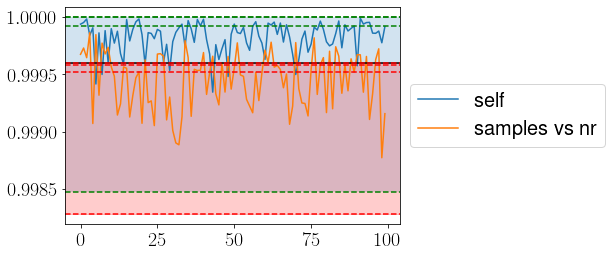

In [173]:
plt.plot(matches_self, label='self');
plt.plot(matches, label='samples vs nr');

plt.axhline(matches_bar[0], c='k')

plt.axhspan(matches_nr_nr.min(), matches_nr_nr.max(), alpha=0.2)
plt.axhspan(matches_nr_other_gpm_bar.min(), matches_nr_other_gpm_bar.max(), alpha=0.2, color='r')

for m_ in matches_nr_nr:
    plt.axhline(m_, c='g', ls='--')

for m_ in matches_nr_other_gpm_bar:
    plt.axhline(m_, c='r', ls='--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [174]:
matches.max() - matches.min()

0.001090104201781572

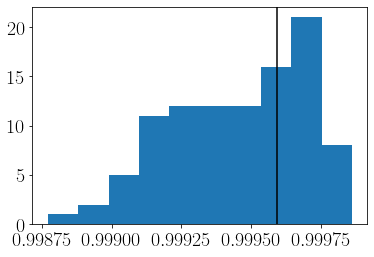

In [175]:
plt.hist(matches);
plt.axvline(matches_bar[0], c='k')

In [176]:
# # y1_bar = hp1s_bar[0].numpy()
# # y1_samples = np.array([hp1s[i].numpy() for i in range(len(hp1s))])
# # y2 = hp2.numpy()


y1_bar = pycbc.waveform.utils.amplitude_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
amp_ts = [pycbc.waveform.utils.amplitude_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
y1_samples = np.array([amp_ts[i].numpy() for i in range(len(hp1s))])
y2 = pycbc.waveform.utils.amplitude_from_polarizations(hp2, hc2).numpy()
times = amp_ts[0].sample_times
times_M = phenom.StoM(times, Mtotal)

# y1_bar = pycbc.waveform.utils.phase_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
# phase_ts = [pycbc.waveform.utils.phase_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
# y1_samples = np.array([phase_ts[i].numpy() for i in range(len(hp1s))])
# y2 = pycbc.waveform.utils.phase_from_polarizations(hp2, hc2).numpy()
# times = phase_ts[0].sample_times
# times_M = phenom.StoM(times, Mtotal)

# y1_bar = pycbc.waveform.utils.frequency_from_polarizations(hp1s_bar[0], hc1s_bar[0]).numpy()
# freqs_ts = [pycbc.waveform.utils.frequency_from_polarizations(hp1s[i], hc1s[i]) for i in range(len(hp1s))]
# y1_samples = np.array([freqs_ts[i].numpy() for i in range(len(hp1s))])
# y2 = pycbc.waveform.utils.frequency_from_polarizations(hp2, hc2).numpy()
# times = freqs_ts[0].sample_times
# times_M = phenom.StoM(times, Mtotal)


In [177]:
# y1_bar = IUS(times, y1_bar).derivative()(times)
# y1_samples = np.array([IUS(times, y1_sample).derivative()(times) for y1_sample in y1_samples])
# y2 = IUS(times, y2).derivative()(times)

In [178]:
def plot_comparison(times, y1_bar, y1_samples, y2):
    plt.figure(figsize=(14, 4), dpi=100)

    color='deepskyblue'
    # color='C0'
    # color='C1'
    # color='salmon'

    plt.plot(times, y1_bar, label=f'GPM Mean Match', c=color)

    plt.plot(times, y1_samples[0].T, alpha=0.5, label='GPM samples', c=color)
    plt.plot(times, y1_samples[:10].T, alpha=0.5, c=color)
    plt.fill_between(times, y1=y1_samples.min(0), y2=y1_samples.max(0), alpha=0.2, color=color)

    plt.plot(times, y2, ls='-', label='NR', lw=2, c='k')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # plt.title(f"q={nr_data['df']['q'].iloc[idx]}")

    # plt.xlim(-100, 100)
    # plt.xlim(250, 600)
    # plt.ylim(0, 200)
    # plt.yscale('log')

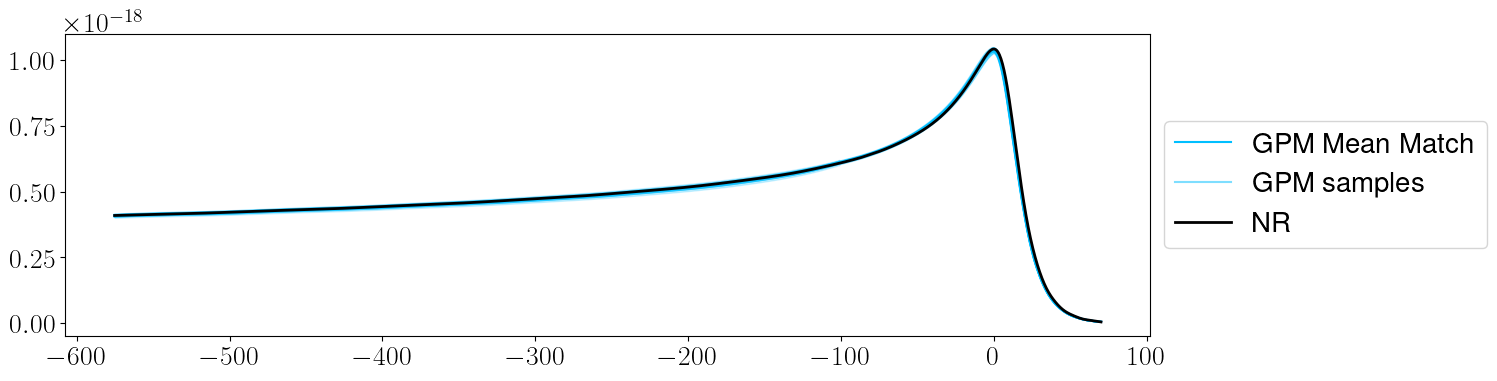

In [179]:
plot_comparison(times_M, y1_bar, y1_samples, y2)

(-100.0, 100.0)

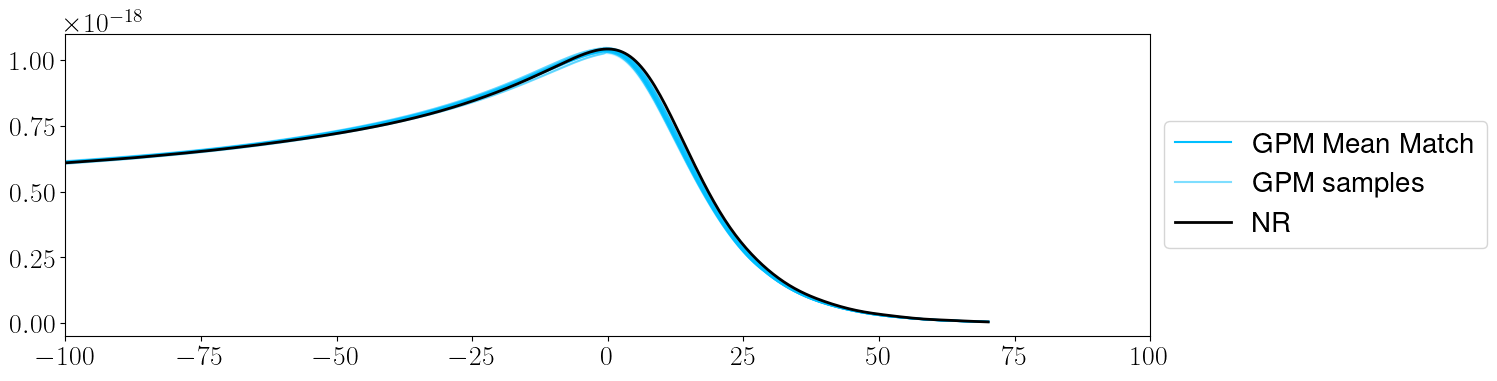

In [180]:
plot_comparison(times_M, y1_bar, y1_samples, y2)
plt.xlim(-100, 100)

Text(0.5, 1.0, 'q=2.0')

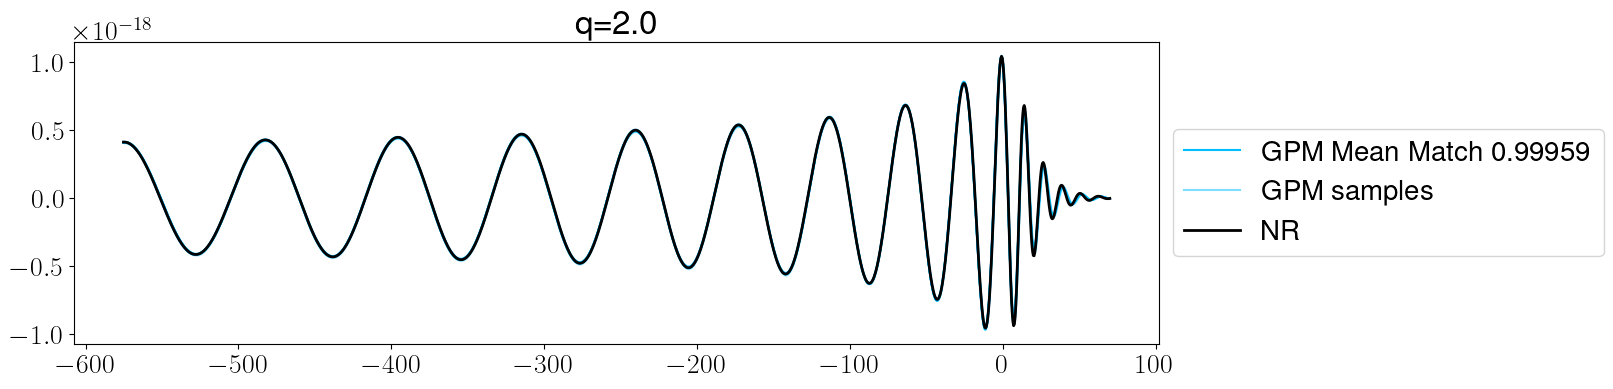

In [181]:
vs = np.array([hp1s[i].numpy() for i in range(len(hp1s))])

times = hp1s[0].sample_times
times_M = phenom.StoM(times, Mtotal)

plt.figure(figsize=(14, 4), dpi=100)

color='deepskyblue'
# color='C0'
# color='C1'
# color='salmon'

plt.plot(times_M, hp1s_bar[0], label=f'GPM Mean Match {matches_bar[0]:.5f}', c=color)

plt.plot(times_M, vs[0].T, alpha=0.5, label='GPM samples', c=color)
plt.plot(times_M, vs[:10].T, alpha=0.5, c=color)
plt.fill_between(times_M, y1=vs.min(0), y2=vs.max(0), alpha=0.2, color=color)

plt.plot(times_M, hp2, ls='-', label='NR', lw=2, c='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(f"q={q}")

# plt.xlim(-100, 100)


# self

In [182]:
# q = 32
q = 18
print(q)

# times_ = nr_data['times']
times_ = np.arange(-1000, 100, 0.5)
delta_t = 1/4096.
Mtotal = 100
n_samples = 100

hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=-1,
)

hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
    q=q,
    times=times_,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=n_samples,
)

matches_self, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])

18


In [183]:
print(np.min(matches_self))
print(np.median(matches_self))
print(np.max(matches_self))

0.9949936021428547
0.999590134612639
0.999963923622266


In [184]:
print(np.median(matches_self)-np.min(matches_self))

0.004596532469784309


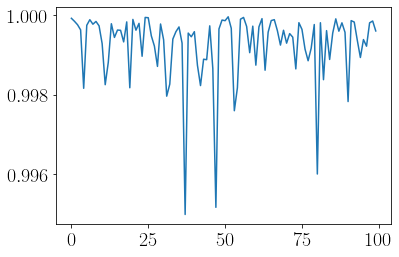

In [185]:
plt.plot(matches_self)

Text(0.5, 1.0, 'q=18 (self comparison)')

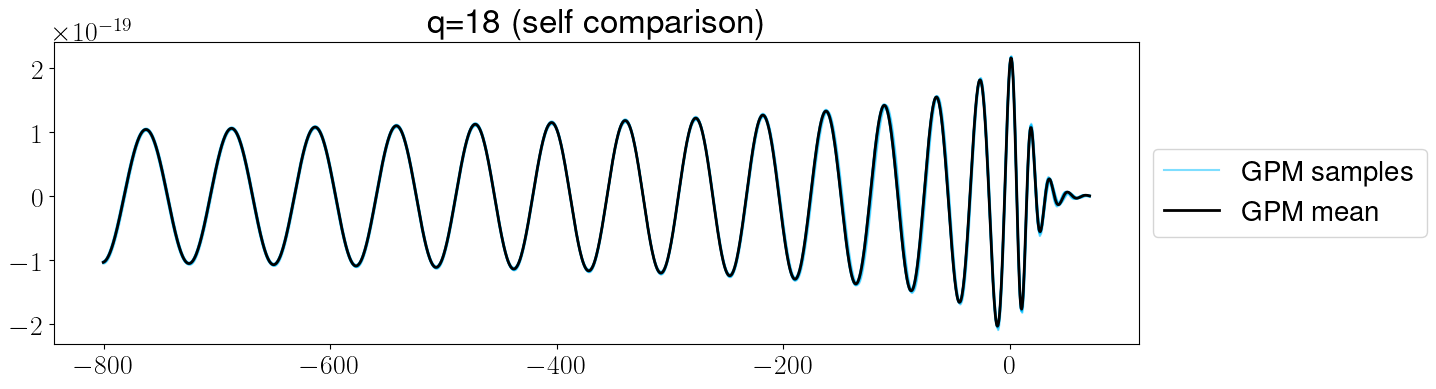

In [186]:
vs = np.array([hp1s_self[i].numpy() for i in range(len(hp1s_self))])

times = hp1s_self[0].sample_times
times_M = phenom.StoM(times, Mtotal)

plt.figure(figsize=(14, 4), dpi=100)

color='deepskyblue'
# color='C0'
# color='C1'
# color='salmon'

# plt.plot(times_M, hp1s_self[0], c=color)

plt.plot(times_M, vs[0].T, alpha=0.5, label='GPM samples', c=color)
plt.plot(times_M, vs[:10].T, alpha=0.5, c=color)

plt.fill_between(times_M, y1=vs.min(0), y2=vs.max(0), alpha=0.5, color=color)

plt.plot(times_M, hp2_self, ls='-', label='GPM mean', lw=2, c='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title(f"q={q} (self comparison)")

# plt.xlim(-100, 100)

# measures of uncertainty?

In [187]:
# measures of uncertianty?

# is the minimum match of the mean model with samples of itself a good proxy for the true accuracy of the model?

In [188]:
%%time
qs = np.arange(1, 33, 0.25)
# qs = np.arange(1, 33, 1)

# times_ = nr_data['times']
times_ = np.arange(-700, 100, 0.5)
delta_t = 1/4096.
# delta_t = 1/2048.
Mtotal = 100
# n_samples = 50
# n_samples = 100
# n_samples = 300
n_samples = 1000

matches_self = []

for i in range(len(qs)):
    q = qs[i]

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=n_samples,
    )

    matches_self_, hp1s_self, hc1s_self, hp2_self, hc2_self = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_gpm_bar[0], hc_gpm_bar[0])
    matches_self.append(matches_self_)
    
matches_self = np.array(matches_self)

CPU times: user 24min 39s, sys: 7.76 s, total: 24min 46s
Wall time: 24min 45s


In [189]:
matches_self.shape

(128, 1000)

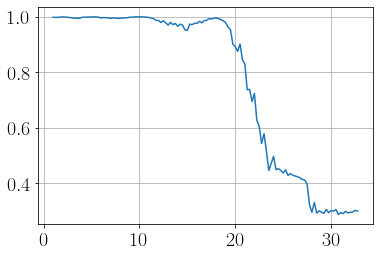

In [190]:
plt.figure()
plt.plot(qs, np.min(matches_self, 1))
plt.grid()

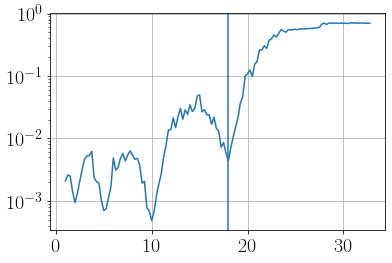

In [191]:
plt.figure()
plt.plot(qs, 1-np.min(matches_self, 1))
plt.grid()
plt.yscale('log')
plt.axvline(18)

# simplify a bit

## train waveforms - match between GPM mean and NR waveforms

In [192]:
qs_train_idxs = nr_data['df'].query("set == 'train'")['q'].index

qs_train = nr_data['df'].query("set == 'train'")['q'].values


In [193]:
qs_train_idxs

Int64Index([ 0,  4,  6,  8, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26,
            27, 31, 35, 37, 38, 46, 51, 53],
           dtype='int64')

In [194]:
qs_train

array([18., 10., 18., 18.,  5.,  5.,  5.,  2.,  2.,  2.,  1., 10.,  1.,
       10.,  1., 10.,  5.,  1.,  1.,  6.,  2., 10.,  2.,  5.,  6.])

In [195]:
matches_nr_other_gpm_bar_train=[]
# for q in qs_train:
for idx in qs_train_idxs:

    # idxs = nr_data['df'].query(f"q == {q}").index

    # idx = 7
    # idx=33
    # idx=34
    # q = nr_data['df']['q'].values[idx]
    # print(f"q = {q}")
    print(f"idx = {idx}")
    q = nr_data['df']['q'][idx]

    times_ = nr_data['times']
    # nr_strains = nr_data['strains'][idxs]
    nr_strains = nr_data['strains'][idx]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_nrs, hc_nrs = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strains,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms([hp_nrs], [hc_nrs], hp_gpm_bar[0], hc_gpm_bar[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_train.append(1-matches_nr_other_gpm_bar_[0])


idx = 0
idx = 4
idx = 6
idx = 8
idx = 10
idx = 12
idx = 13
idx = 15
idx = 16
idx = 17
idx = 18
idx = 19
idx = 20
idx = 21
idx = 22
idx = 23
idx = 26
idx = 27
idx = 31
idx = 35
idx = 37
idx = 38
idx = 46
idx = 51
idx = 53


In [196]:
qs_train

array([18., 10., 18., 18.,  5.,  5.,  5.,  2.,  2.,  2.,  1., 10.,  1.,
       10.,  1., 10.,  5.,  1.,  1.,  6.,  2., 10.,  2.,  5.,  6.])

In [197]:
# for each NR simulation in the training data (including duplicates)
# compute the mismatch with GPM_mean
matches_nr_other_gpm_bar_train

[0.0006113347186891271,
 9.72132631366085e-05,
 0.0006898507747195026,
 0.0007445119730440375,
 0.0001651554789728893,
 0.00021631950500999864,
 0.00025628295577995175,
 0.0004058896087415498,
 0.0004042483516870643,
 0.00041634061451734095,
 0.0001486425671790581,
 0.0008433826351653684,
 0.00014892689145151738,
 0.0004947004268780475,
 0.0001472774283139966,
 0.0003668744270720614,
 0.0006634631244915035,
 0.0002886291356344328,
 0.0008783146401327713,
 0.00013572711458265108,
 0.0004808608805781933,
 0.00011863256188782145,
 0.0017232093903291057,
 0.0009772284596510916,
 0.0010031415091932283]

In [198]:
df_=pd.DataFrame({'q':qs_train, 'mm':matches_nr_other_gpm_bar_train}).groupby(by='q').agg([('min',np.min), ('median',np.median), ('max',np.max)]).sort_index()
df_.columns = df_.columns.droplevel(0)

df_['lower'] = df_['median']-df_['min']
df_['upper'] = df_['max']-df_['median']

train_err_bar_data = df_.reset_index().copy()

In [199]:
train_err_bar_data

q       min    median       max     lower     upper
0   1.0  0.000147  0.000149  0.000878  0.000002  0.000729
1   2.0  0.000404  0.000416  0.001723  0.000012  0.001307
2   5.0  0.000165  0.000256  0.000977  0.000091  0.000721
3   6.0  0.000136  0.000569  0.001003  0.000434  0.000434
4  10.0  0.000097  0.000367  0.000843  0.000270  0.000477
5  18.0  0.000611  0.000690  0.000745  0.000079  0.000055

q       min    median       max     lower     upper
0   1.0  0.000147  0.000149  0.000878  0.000002  0.000729
1   2.0  0.000404  0.000416  0.001723  0.000012  0.001307
2   5.0  0.000165  0.000256  0.000977  0.000091  0.000721
3   6.0  0.000136  0.000569  0.001003  0.000434  0.000434
4  10.0  0.000097  0.000367  0.000843  0.000270  0.000477
5  18.0  0.000611  0.000690  0.000745  0.000079  0.000055

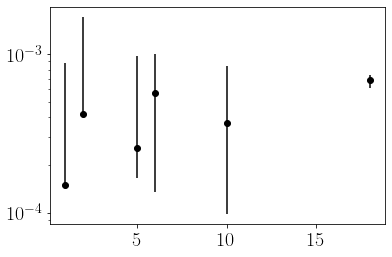

In [200]:


# train_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_train])
# train_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_train])
# train_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_train])
# # plt.errorbar(qs_train, train_median_, yerr=[train_median_-train_min_, train_max_-train_median_], fmt='ok')

# train_err_bar_data = pd.DataFrame({'q':qs_train, 'min':train_min_, 'median':train_median_, 'max':train_max_, 'lower':train_median_-train_min_, 'upper':train_max_-train_median_}).drop_duplicates(subset=['q']).sort_values(by='q')

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='ok')

plt.yscale('log')

train_err_bar_data

## test waveforms - match between GPM mean and NR waveforms

In [201]:
qs_test_idxs = nr_data['df'].query("set == 'test'")['q'].index

qs_test = nr_data['df'].query("set == 'test'")['q'].values


In [202]:
qs_test_idxs

Int64Index([ 1,  2,  3,  5,  7,  9, 11, 14, 24, 25, 28, 29, 30, 32, 33, 34, 36,
            39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 52],
           dtype='int64')

In [203]:
qs_test

array([ 4.  ,  8.  ,  8.  ,  4.  ,  8.  ,  4.  ,  4.  ,  4.  ,  7.  ,
        1.18,  4.  ,  1.33, 15.  ,  2.41, 15.  , 32.  ,  1.82, 32.  ,
        2.2 ,  2.05,  2.25,  2.35,  4.  ,  1.2 ,  3.  ,  1.75,  1.5 ,
        1.25,  2.5 ])

In [204]:
matches_nr_other_gpm_bar_test=[]
for idx in qs_test_idxs:

    print(f"idx = {idx}")
    q = nr_data['df']['q'][idx]

    times_ = nr_data['times']
    # nr_strains = nr_data['strains'][idxs]
    nr_strains = nr_data['strains'][idx]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
    )

    hp_nrs, hc_nrs = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strains,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
    )

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms([hp_nrs], [hc_nrs], hp_gpm_bar[0], hc_gpm_bar[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_test.append(1-matches_nr_other_gpm_bar_[0])


idx = 1
idx = 2
idx = 3
idx = 5
idx = 7
idx = 9
idx = 11
idx = 14
idx = 24
idx = 25
idx = 28
idx = 29
idx = 30
idx = 32
idx = 33
idx = 34
idx = 36
idx = 39
idx = 40
idx = 41
idx = 42
idx = 43
idx = 44
idx = 45
idx = 47
idx = 48
idx = 49
idx = 50
idx = 52


In [205]:
matches_nr_other_gpm_bar_test

[0.001331642213185602,
 0.00034894458084577806,
 0.0001595597294842266,
 0.0012483384007362375,
 0.000554422208644656,
 0.0013226578449694326,
 0.0003361466121307721,
 0.0005241546923128171,
 7.737202462720916e-05,
 0.0002814146127384509,
 0.0004891438785766811,
 0.00057076353692187,
 0.0003605021087760285,
 0.0005699725626823193,
 0.00021432011072863855,
 0.29443136230785016,
 0.0006260615769636546,
 0.3005241825393321,
 0.0017313292935953184,
 0.0015836656513875669,
 0.002106849239956299,
 0.0018083002843292117,
 0.0017277301311870996,
 0.0014733533719523129,
 0.0022830645956432027,
 0.0013107675566963461,
 0.0009937999098134087,
 0.0010421525227685136,
 0.0020588957599881885]

In [206]:
df_=pd.DataFrame({'q':qs_test, 'mm':matches_nr_other_gpm_bar_test}).groupby(by='q').agg([('min',np.min), ('median',np.median), ('max',np.max)]).sort_index()
df_.columns = df_.columns.droplevel(0)

df_['lower'] = df_['median']-df_['min']
df_['upper'] = df_['max']-df_['median']

test_err_bar_data = df_.reset_index().copy()

In [207]:
test_err_bar_data

q       min    median       max     lower     upper
0    1.18  0.000281  0.000281  0.000281  0.000000  0.000000
1    1.20  0.001473  0.001473  0.001473  0.000000  0.000000
2    1.25  0.001042  0.001042  0.001042  0.000000  0.000000
3    1.33  0.000571  0.000571  0.000571  0.000000  0.000000
4    1.50  0.000994  0.000994  0.000994  0.000000  0.000000
5    1.75  0.001311  0.001311  0.001311  0.000000  0.000000
6    1.82  0.000626  0.000626  0.000626  0.000000  0.000000
7    2.05  0.001584  0.001584  0.001584  0.000000  0.000000
8    2.20  0.001731  0.001731  0.001731  0.000000  0.000000
9    2.25  0.002107  0.002107  0.002107  0.000000  0.000000
10   2.35  0.001808  0.001808  0.001808  0.000000  0.000000
11   2.41  0.000570  0.000570  0.000570  0.000000  0.000000
12   2.50  0.002059  0.002059  0.002059  0.000000  0.000000
13   3.00  0.002283  0.002283  0.002283  0.000000  0.000000
14   4.00  0.000336  0.001248  0.001728  0.000912  0.000479
15   7.00  0.000077  0.000077  0.000077  0.000000  0.000000
16   8.00  0.000160  0.000349  0.000554  0.000189  0.000205
17  15.00  0.000214  0.000287  0.000361  0.000073  0.000073
18  32.00  0.294431  0.297478  0.300524  0.003046  0.003046

In [208]:
# test_err_bar_data['max_match'] = 1-test_err_bar_data['max']
# test_err_bar_data.sort_values(by='max_match')

q       min    median       max     lower     upper
0    1.18  0.000281  0.000281  0.000281  0.000000  0.000000
1    1.20  0.001473  0.001473  0.001473  0.000000  0.000000
2    1.25  0.001042  0.001042  0.001042  0.000000  0.000000
3    1.33  0.000571  0.000571  0.000571  0.000000  0.000000
4    1.50  0.000994  0.000994  0.000994  0.000000  0.000000
5    1.75  0.001311  0.001311  0.001311  0.000000  0.000000
6    1.82  0.000626  0.000626  0.000626  0.000000  0.000000
7    2.05  0.001584  0.001584  0.001584  0.000000  0.000000
8    2.20  0.001731  0.001731  0.001731  0.000000  0.000000
9    2.25  0.002107  0.002107  0.002107  0.000000  0.000000
10   2.35  0.001808  0.001808  0.001808  0.000000  0.000000
11   2.41  0.000570  0.000570  0.000570  0.000000  0.000000
12   2.50  0.002059  0.002059  0.002059  0.000000  0.000000
13   3.00  0.002283  0.002283  0.002283  0.000000  0.000000
14   4.00  0.000336  0.001248  0.001728  0.000912  0.000479
15   7.00  0.000077  0.000077  0.000077  0.000000  0.000000
16   8.00  0.000160  0.000349  0.000554  0.000189  0.000205
17  15.00  0.000214  0.000287  0.000361  0.000073  0.000073
18  32.00  0.294431  0.297478  0.300524  0.003046  0.003046

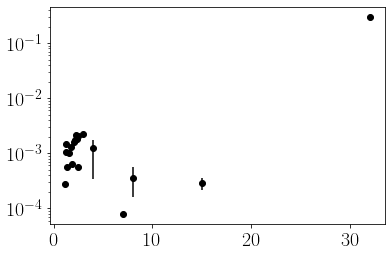

In [209]:


# test_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_test])
# test_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_test])
# test_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_test])
# # plt.errorbar(qs_test, test_median_, yerr=[test_median_-test_min_, test_max_-test_median_], fmt='ok')

# test_err_bar_data = pd.DataFrame({'q':qs_test, 'min':test_min_, 'median':test_median_, 'max':test_max_, 'lower':test_median_-test_min_, 'upper':test_max_-test_median_}).drop_duplicates(subset=['q']).sort_values(by='q')

plt.errorbar(test_err_bar_data['q'], test_err_bar_data['median'], yerr=[test_err_bar_data['lower'], test_err_bar_data['upper']], fmt='ok')

plt.yscale('log')

test_err_bar_data

## NR vs NR (duplicates only)

In [210]:
qs_nr_vs_nr = np.sort(nr_data['df'].query("has_dup == True")['q'].unique())
qs_nr_vs_nr

array([ 1.,  2.,  4.,  5.,  6.,  8., 10., 15., 18., 32.])

In [211]:
matches_nr_other_gpm_bar_nr_vs_nr=[]
for q in qs_nr_vs_nr:

    idxs = nr_data['df'].query(f"q == {q}").index

    # idx = 7
    # idx=33
    # idx=34
    # q = nr_data['df']['q'].values[idx]
    print(f"q = {q}")

    times_ = nr_data['times']
    nr_strains = nr_data['strains'][idxs]
    delta_t = 1/4096.
    Mtotal = 100
    n_samples = 100
    t_nr_start = -800

    hp_nrs = []
    hc_nrs = []
    for i in range(len(idxs)):
        hp_nrs_, hc_nrs_ = analysis_utils.get_nr_strain(
            q=q,
            strain=nr_strains[i],
            times=times_,
            M=Mtotal,
            delta_t=delta_t,
            t_nr_start=t_nr_start,
        )
        hp_nrs.append(hp_nrs_)
        hc_nrs.append(hc_nrs_)

    # compare the mean model prediction with all the NR waveforms:
    matches_nr_other_gpm_bar_, hp1s_nr_other_gpm_bar, hc1s_nr_other_gpm_bar, hp2_nr_other_gpm_bar, hc2_nr_other_gpm_bar = compare_waveforms(hp_nrs[1:], hc_nrs[1:], hp_nrs[0], hc_nrs[0])

    # compare a reference NR with the other NR simulations at the same mass-ratio:
    matches_nr_other_gpm_bar_nr_vs_nr.append(1-matches_nr_other_gpm_bar_)


q = 1.0
q = 2.0
q = 4.0
q = 5.0
q = 6.0
q = 8.0
q = 10.0
q = 15.0
q = 18.0
q = 32.0


In [212]:
matches_nr_other_gpm_bar_nr_vs_nr

[array([2.49134924e-09, 1.28859935e-08, 9.33942425e-05, 8.06545340e-04]),
 array([3.16873311e-08, 8.08175825e-07, 7.98467732e-05, 1.52992487e-03]),
 array([6.07432161e-06, 1.12356546e-06, 5.07200604e-04, 4.88931481e-04,
        8.51624203e-04, 1.40056238e-04]),
 array([2.37713792e-05, 5.24270868e-05, 3.05765317e-04, 7.41255375e-04]),
 array([0.00104681]),
 array([0.00035137, 0.00018451]),
 array([6.36926130e-04, 3.83084773e-04, 2.61787449e-04, 3.19599684e-05]),
 array([3.18988018e-05]),
 array([6.72513862e-05, 3.68968220e-05]),
 array([0.00332761])]

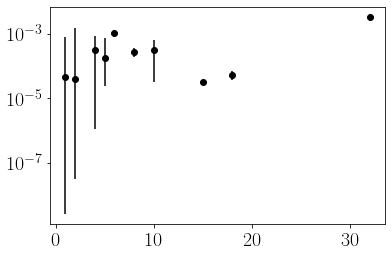

In [213]:


nr_vs_nr_median_ = np.array([np.median(m) for m in matches_nr_other_gpm_bar_nr_vs_nr])
nr_vs_nr_min_ = np.array([m.min() for m in matches_nr_other_gpm_bar_nr_vs_nr])
nr_vs_nr_max_ = np.array([m.max() for m in matches_nr_other_gpm_bar_nr_vs_nr])
plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok')
plt.yscale('log')

## plot

In [214]:
train_err_bar_data

q       min    median       max     lower     upper
0   1.0  0.000147  0.000149  0.000878  0.000002  0.000729
1   2.0  0.000404  0.000416  0.001723  0.000012  0.001307
2   5.0  0.000165  0.000256  0.000977  0.000091  0.000721
3   6.0  0.000136  0.000569  0.001003  0.000434  0.000434
4  10.0  0.000097  0.000367  0.000843  0.000270  0.000477
5  18.0  0.000611  0.000690  0.000745  0.000079  0.000055

In [215]:
test_err_bar_data

q       min    median       max     lower     upper
0    1.18  0.000281  0.000281  0.000281  0.000000  0.000000
1    1.20  0.001473  0.001473  0.001473  0.000000  0.000000
2    1.25  0.001042  0.001042  0.001042  0.000000  0.000000
3    1.33  0.000571  0.000571  0.000571  0.000000  0.000000
4    1.50  0.000994  0.000994  0.000994  0.000000  0.000000
5    1.75  0.001311  0.001311  0.001311  0.000000  0.000000
6    1.82  0.000626  0.000626  0.000626  0.000000  0.000000
7    2.05  0.001584  0.001584  0.001584  0.000000  0.000000
8    2.20  0.001731  0.001731  0.001731  0.000000  0.000000
9    2.25  0.002107  0.002107  0.002107  0.000000  0.000000
10   2.35  0.001808  0.001808  0.001808  0.000000  0.000000
11   2.41  0.000570  0.000570  0.000570  0.000000  0.000000
12   2.50  0.002059  0.002059  0.002059  0.000000  0.000000
13   3.00  0.002283  0.002283  0.002283  0.000000  0.000000
14   4.00  0.000336  0.001248  0.001728  0.000912  0.000479
15   7.00  0.000077  0.000077  0.000077  0.000000  0.000000
16   8.00  0.000160  0.000349  0.000554  0.000189  0.000205
17  15.00  0.000214  0.000287  0.000361  0.000073  0.000073
18  32.00  0.294431  0.297478  0.300524  0.003046  0.003046

In [216]:
# train_err_bar_data.to_csv("/Users/sebastian.khan/Desktop/train-match.csv", index=False)

In [217]:
# test_err_bar_data.to_csv("/Users/sebastian.khan/Desktop/test-match.csv", index=False)

In [218]:
np.min(matches_self, 1).shape

(128,)

compute this with more samples, should the 50th coincide with mean??


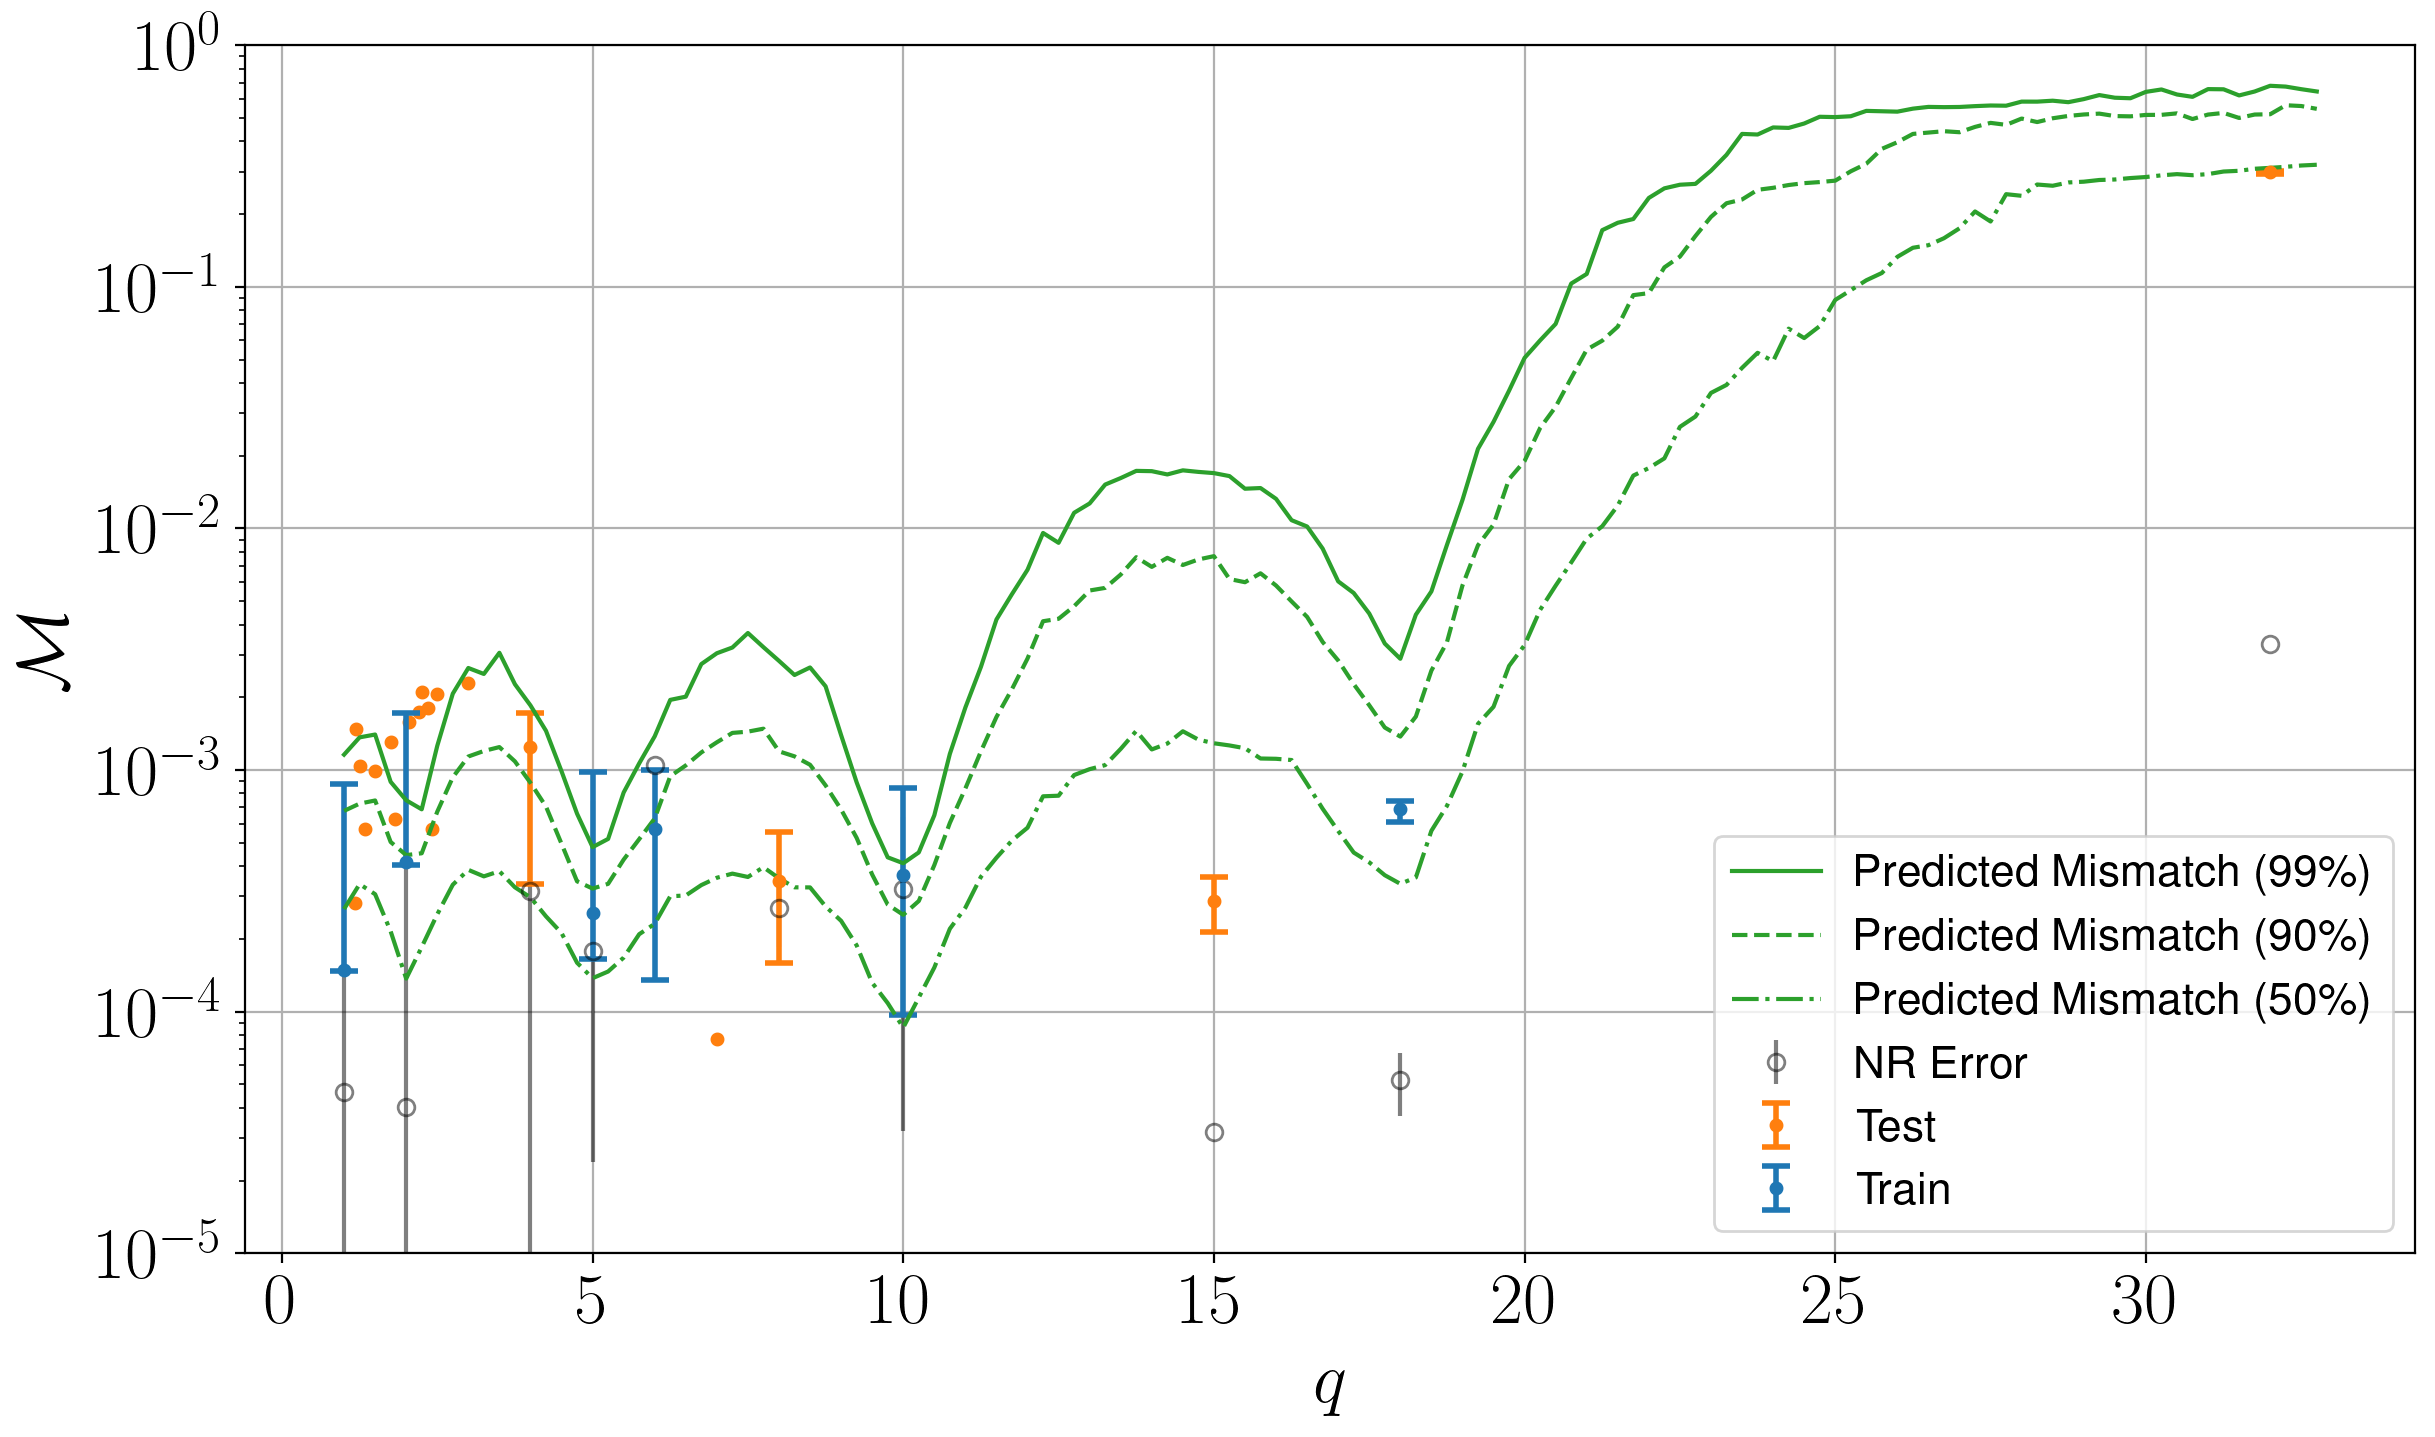

In [219]:
plt.rcParams.update({'font.size':26})
plt.figure(figsize=(14, 8), dpi=200)


plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok', label="NR Error", alpha=0.5, mfc='none')

# split up the test data because
# only some of them have error bars
mask_ = test_err_bar_data['lower'] > 0
plt.plot(test_err_bar_data[~mask_]['q'], test_err_bar_data[~mask_]['median'], 'oC1', markeredgewidth=2, markersize=3)
plt.errorbar(test_err_bar_data[mask_]['q'], test_err_bar_data[mask_]['median'], yerr=[test_err_bar_data[mask_]['lower'], test_err_bar_data[mask_]['upper']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

# label='Estimated Model Error'
# plt.plot(qs, 1-np.min(matches_self, 1), color='C2', label=label)
plt.plot(qs, 1-np.percentile(matches_self, 1, 1), color='C2', label='Predicted Mismatch (99\%)')
plt.plot(qs, 1-np.percentile(matches_self, 10, 1), color='C2', ls='--', label='Predicted Mismatch (90\%)')
plt.plot(qs, 1-np.percentile(matches_self, 50, 1), color='C2', ls='-.', label='Predicted Mismatch (50\%)')
# plt.plot(qs, 1-np.percentile(matches_self, 99, 1), color='C2', ls=':', label='Predicted Mismatch (1\%)')




plt.yscale('log')
# plt.xscale('log')
# plt.title("Mismatch between NR and GPM Mean")
plt.legend(loc='lower right', ncol=1, fontsize=16)
plt.xlabel(r"$q$")
plt.ylabel(r"$\mathcal{M}$")
plt.ylim(1e-5, 1e0)
plt.grid()


# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/mismatch.png", bbox_inches='tight')

print("compute this with more samples, should the 50th coincide with mean??")

compute this with more samples, should the 50th coincide with mean??


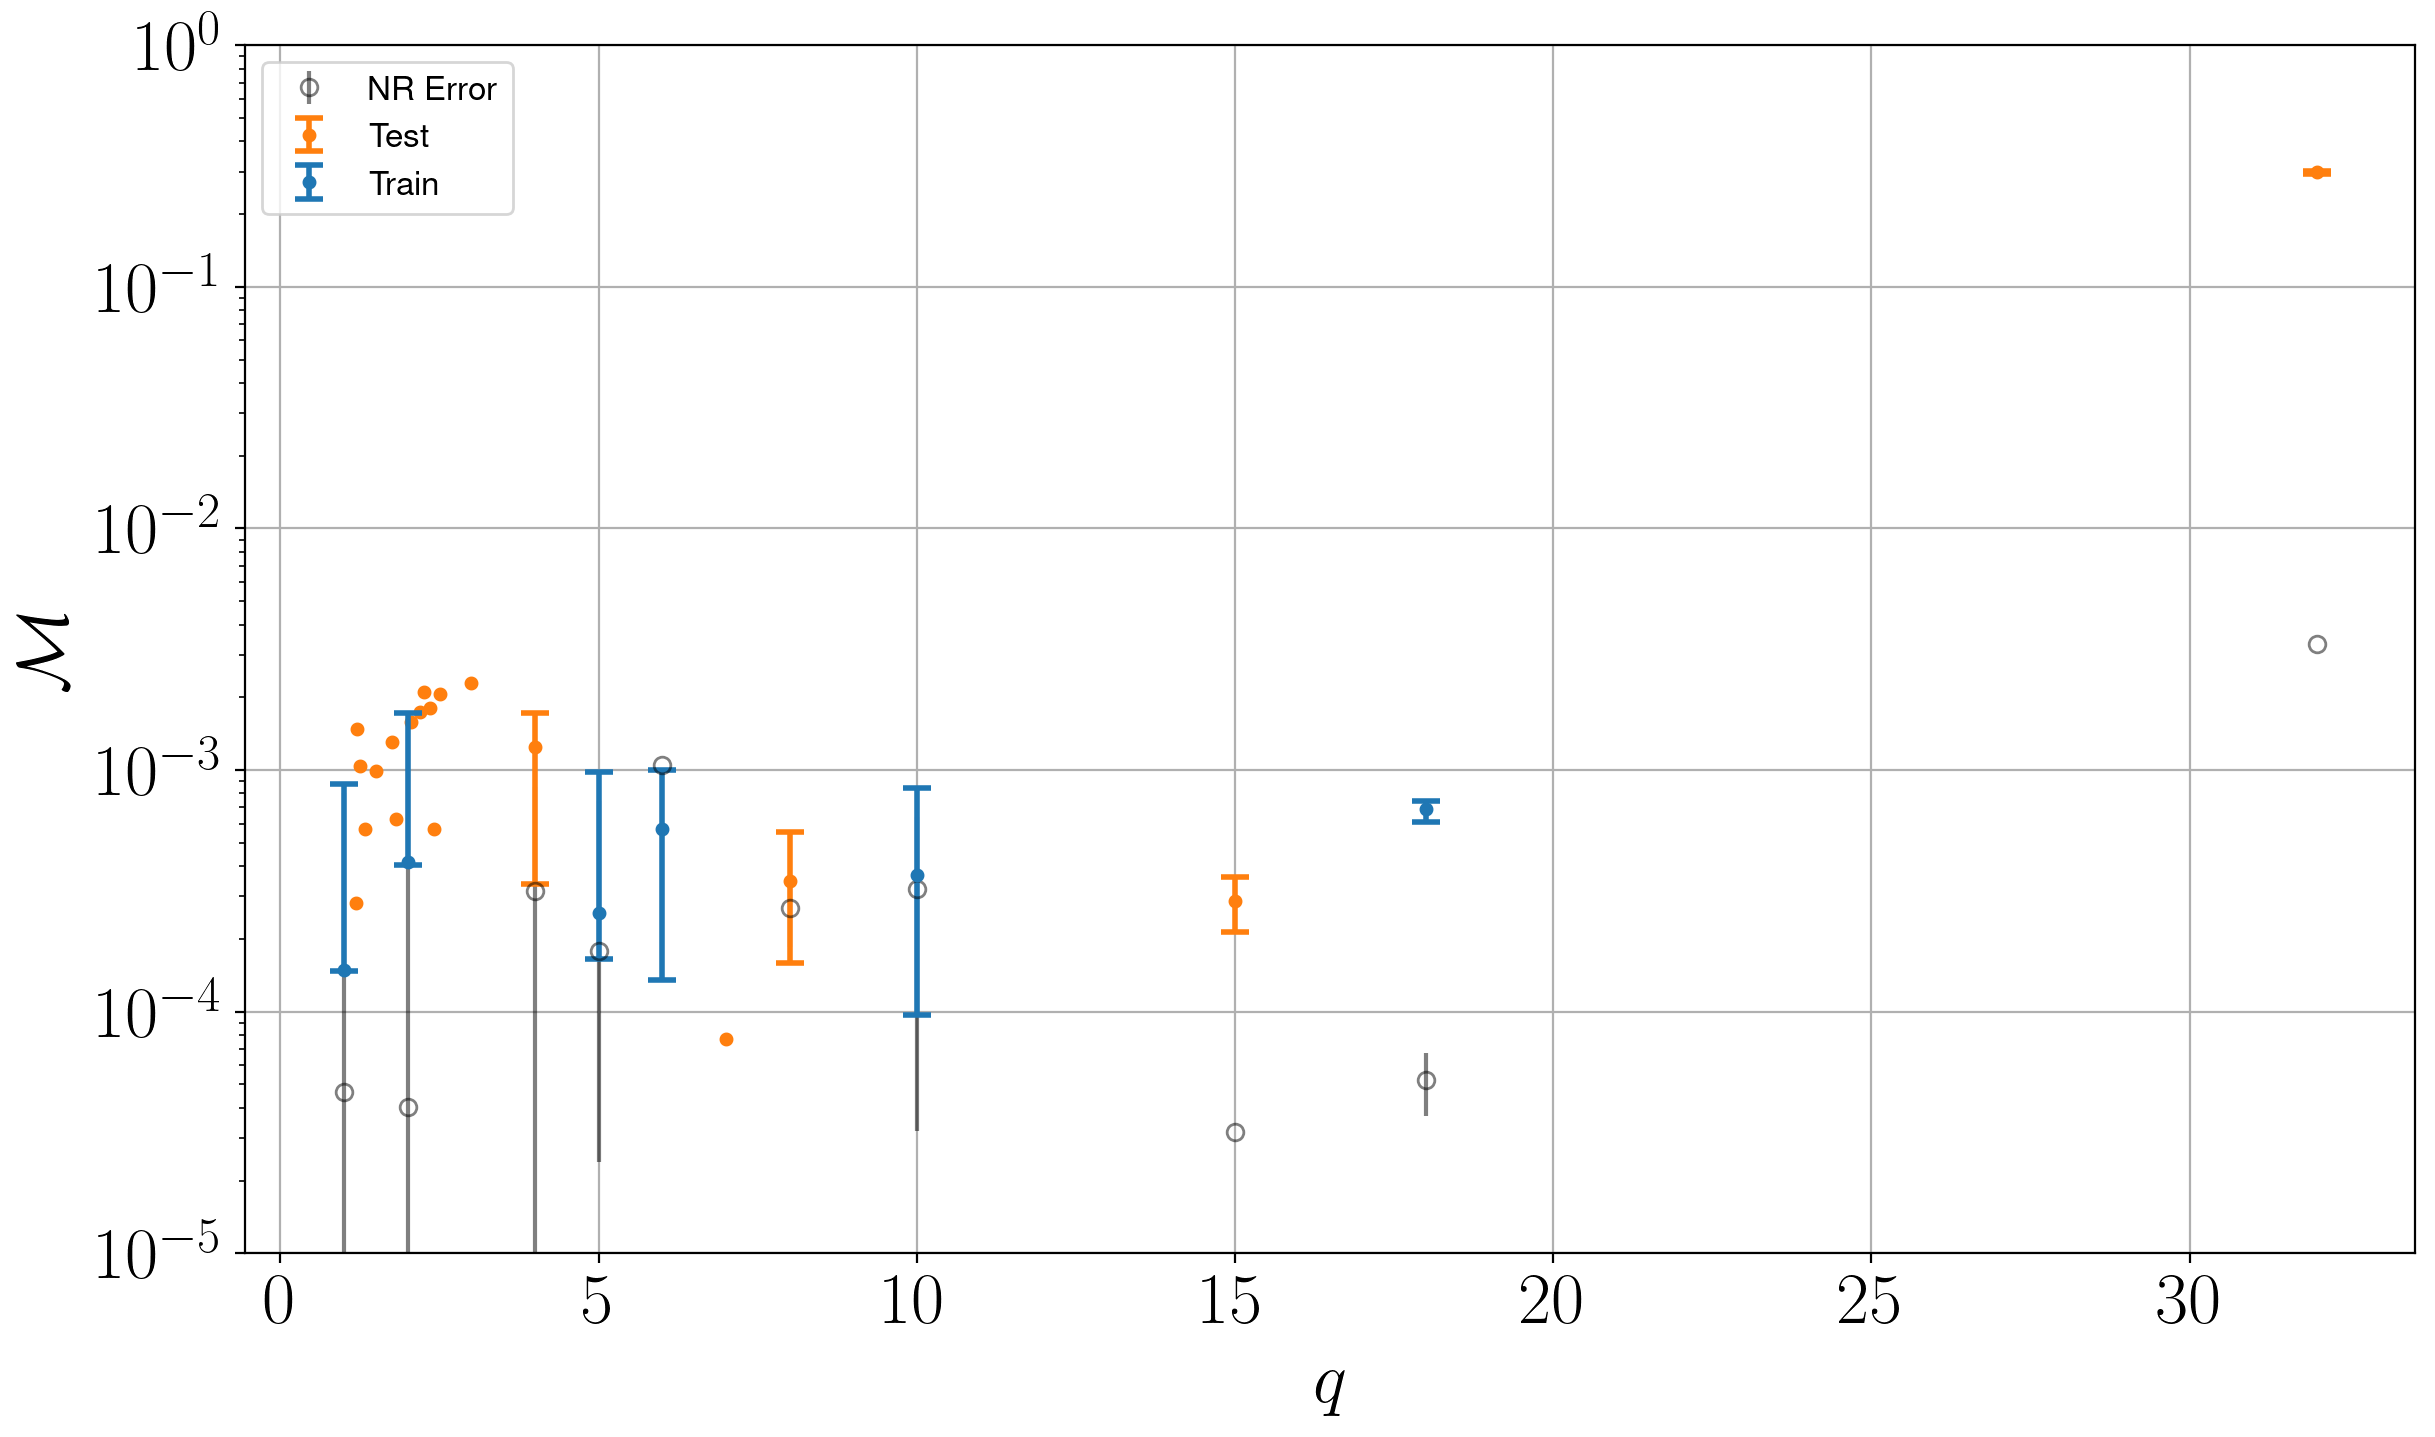

In [283]:
plt.rcParams.update({'font.size':26})
plt.figure(figsize=(14, 8), dpi=200)


plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok', label="NR Error", alpha=0.5, mfc='none')

# split up the test data because
# only some of them have error bars
mask_ = test_err_bar_data['lower'] > 0
plt.plot(test_err_bar_data[~mask_]['q'], test_err_bar_data[~mask_]['median'], 'oC1', markeredgewidth=2, markersize=3)
plt.errorbar(test_err_bar_data[mask_]['q'], test_err_bar_data[mask_]['median'], yerr=[test_err_bar_data[mask_]['lower'], test_err_bar_data[mask_]['upper']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

# label='Estimated Model Error'
# plt.plot(qs, 1-np.min(matches_self, 1), color='C2', label=label)
# plt.plot(qs, 1-np.percentile(matches_self, 1, 1), color='C2', label='Predicted Mismatch (99\%)')
# plt.plot(qs, 1-np.percentile(matches_self, 10, 1), color='C2', ls='--', label='Predicted Mismatch (90\%)')
# plt.plot(qs, 1-np.percentile(matches_self, 50, 1), color='C2', ls='-', label='Predicted Mismatch (median)')
# plt.plot(qs, 1-np.percentile(matches_self, 99, 1), color='C2', ls=':', label='Predicted Mismatch (1\%)')

# w=99
# p1=(100-w)/2
# p2=100 - (100-w)/2
# print(w, p1, p2, p2-p1)
# plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.1, label=r'Predicted Mismatch ($99^{\rm{th}}\%$ width)')
# w=90
# p1=(100-w)/2
# p2=100 - (100-w)/2
# print(w, p1, p2, p2-p1)
# plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.3, label=r'Predicted Mismatch ($90^{\rm{th}}\%$ width)')
# w=50
# p1=(100-w)/2
# p2=100 - (100-w)/2
# print(w, p1, p2, p2-p1)
# plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.5, label=r'Predicted Mismatch ($50^{\rm{th}}\%$ width)')





plt.yscale('log')
# plt.xscale('log')
# plt.title("Mismatch between NR and GPM Mean")
plt.legend(loc='upper left', ncol=1, fontsize=12)
plt.xlabel(r"$q$")
plt.ylabel(r"$\mathcal{M}$")
plt.ylim(1e-5, 1e0)
# plt.grid(lw=0.5, c='k')
plt.grid()


# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/mismatch.png", bbox_inches='tight')

print("compute this with more samples, should the 50th coincide with mean??")

99 0.5 99.5 99.0
90 5.0 95.0 90.0
50 25.0 75.0 50.0
compute this with more samples, should the 50th coincide with mean??


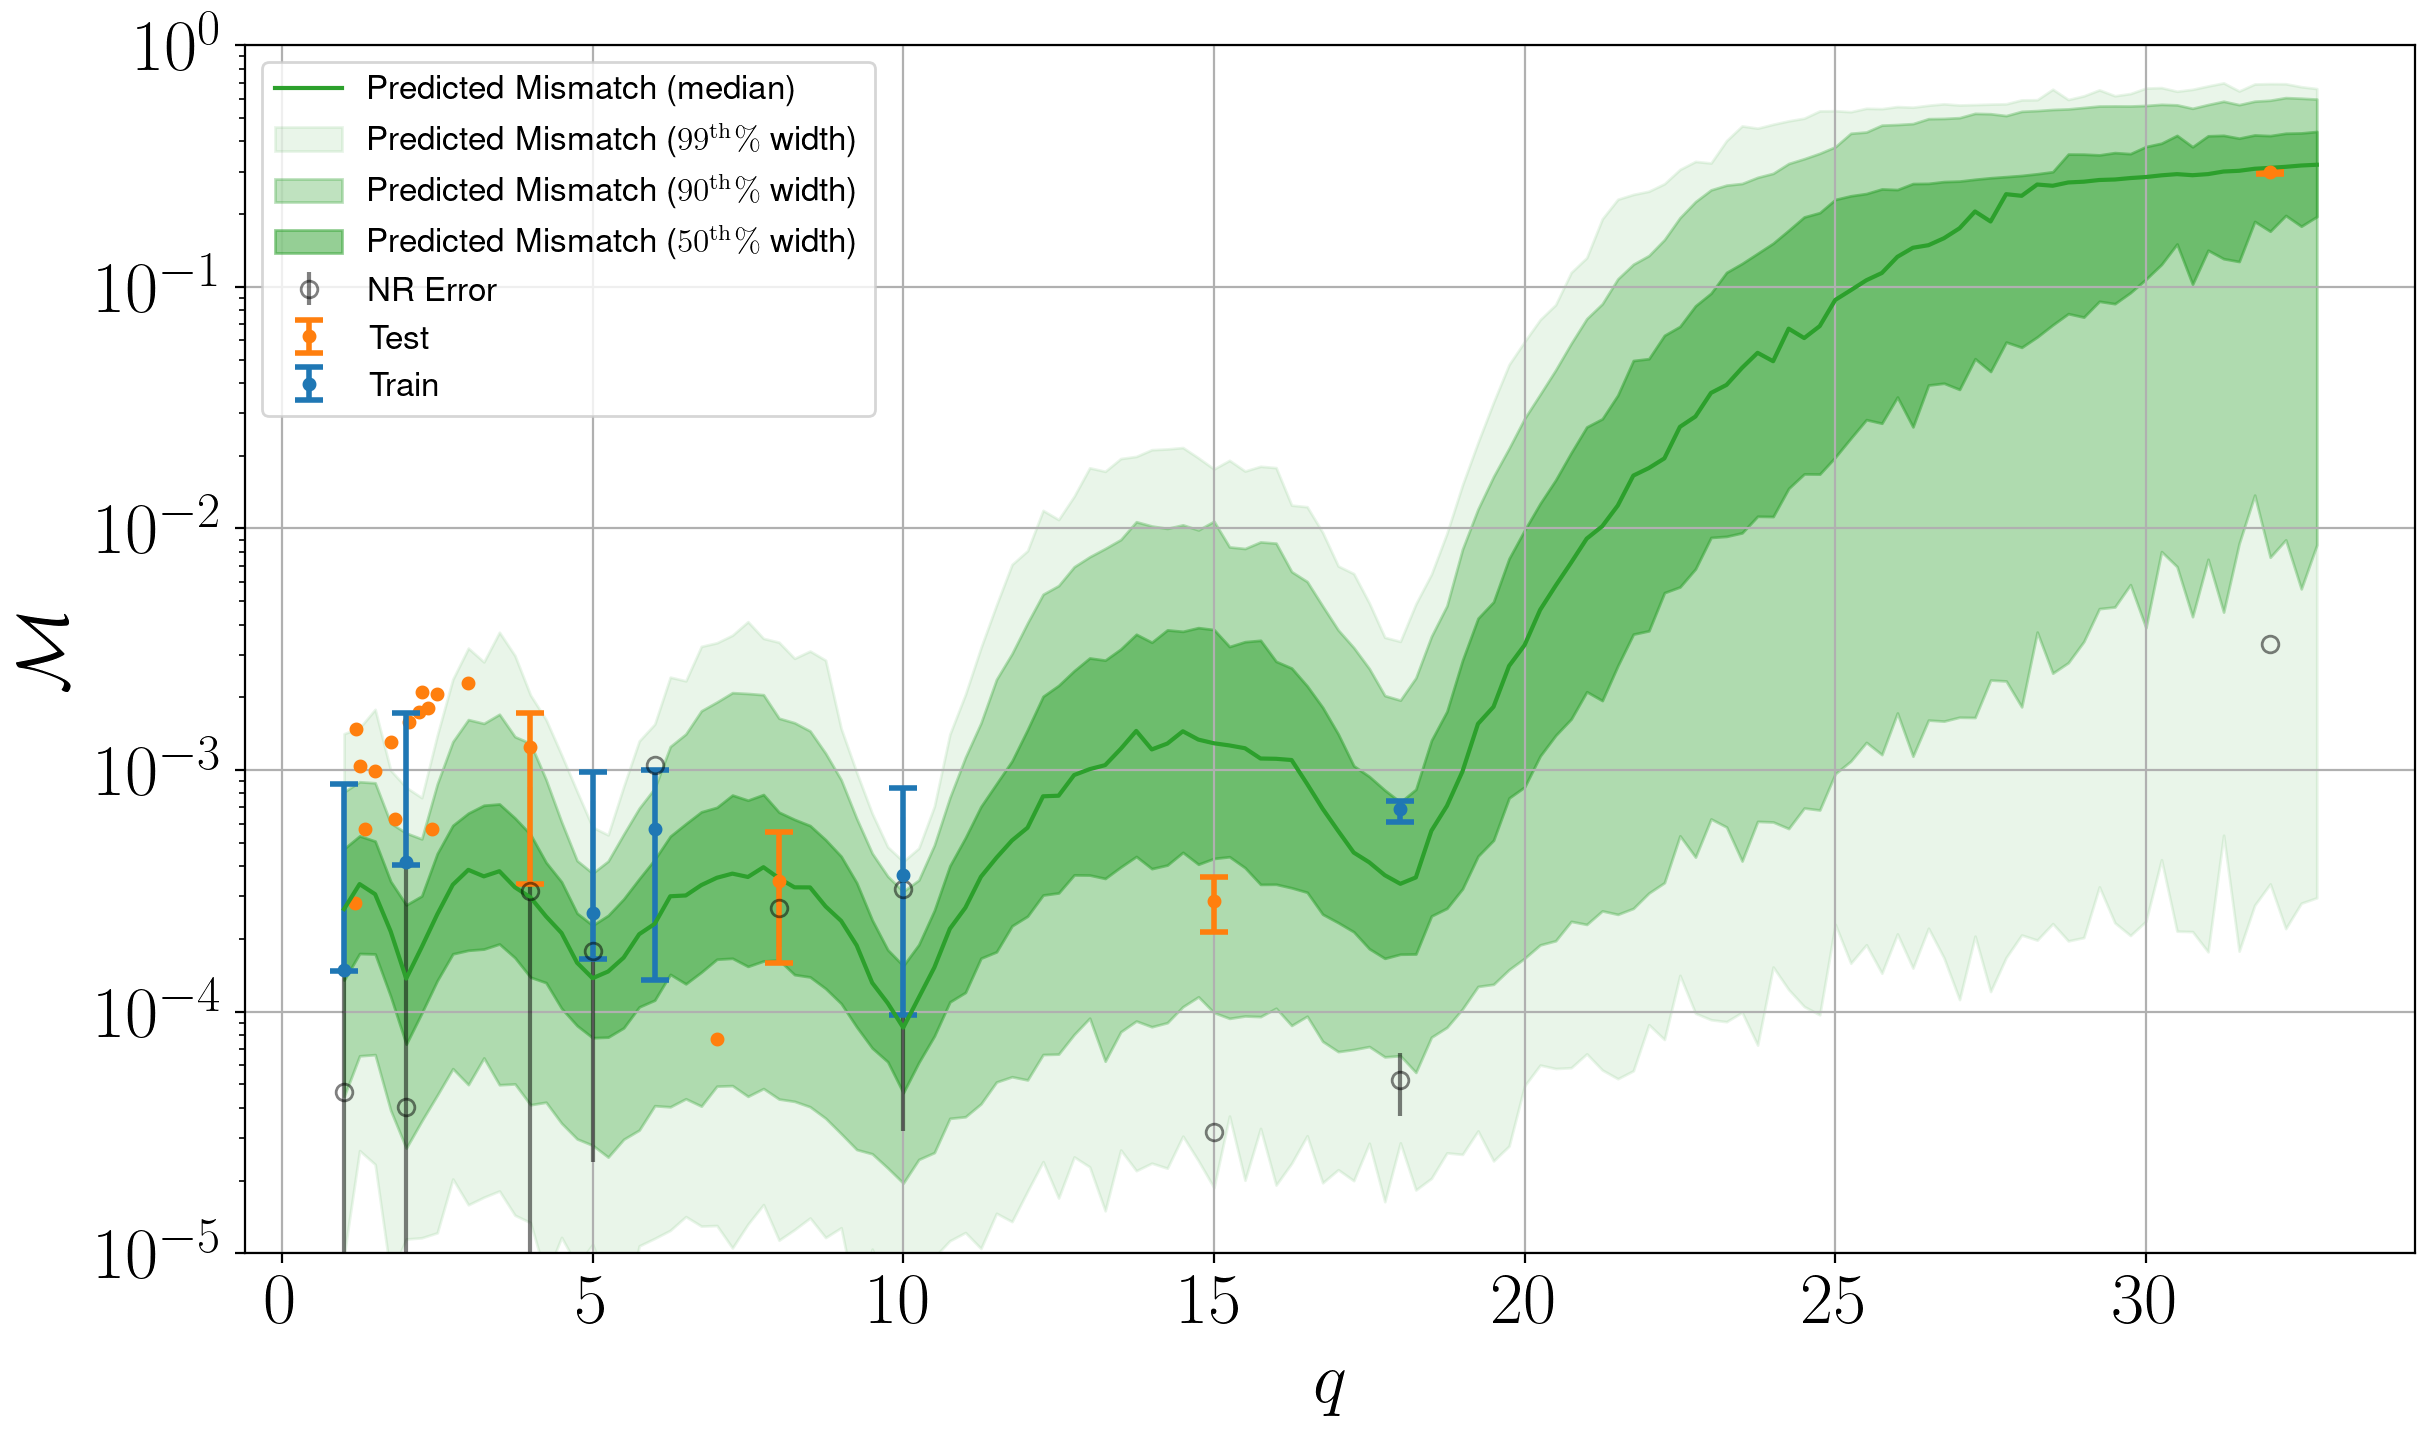

In [220]:
plt.rcParams.update({'font.size':26})
plt.figure(figsize=(14, 8), dpi=200)


plt.errorbar(qs_nr_vs_nr, nr_vs_nr_median_, yerr=[nr_vs_nr_median_-nr_vs_nr_min_, nr_vs_nr_max_-nr_vs_nr_median_], fmt='ok', label="NR Error", alpha=0.5, mfc='none')

# split up the test data because
# only some of them have error bars
mask_ = test_err_bar_data['lower'] > 0
plt.plot(test_err_bar_data[~mask_]['q'], test_err_bar_data[~mask_]['median'], 'oC1', markeredgewidth=2, markersize=3)
plt.errorbar(test_err_bar_data[mask_]['q'], test_err_bar_data[mask_]['median'], yerr=[test_err_bar_data[mask_]['lower'], test_err_bar_data[mask_]['upper']], fmt='oC1', label='Test', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

plt.errorbar(train_err_bar_data['q'], train_err_bar_data['median'], yerr=[train_err_bar_data['lower'], train_err_bar_data['upper']], fmt='oC0', label='Train', capsize=5, elinewidth=2, markeredgewidth=2, markersize=3)

# label='Estimated Model Error'
# plt.plot(qs, 1-np.min(matches_self, 1), color='C2', label=label)
# plt.plot(qs, 1-np.percentile(matches_self, 1, 1), color='C2', label='Predicted Mismatch (99\%)')
# plt.plot(qs, 1-np.percentile(matches_self, 10, 1), color='C2', ls='--', label='Predicted Mismatch (90\%)')
plt.plot(qs, 1-np.percentile(matches_self, 50, 1), color='C2', ls='-', label='Predicted Mismatch (median)')
# plt.plot(qs, 1-np.percentile(matches_self, 99, 1), color='C2', ls=':', label='Predicted Mismatch (1\%)')

w=99
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.1, label=r'Predicted Mismatch ($99^{\rm{th}}\%$ width)')
w=90
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.3, label=r'Predicted Mismatch ($90^{\rm{th}}\%$ width)')
w=50
p1=(100-w)/2
p2=100 - (100-w)/2
print(w, p1, p2, p2-p1)
plt.fill_between(qs, y1=1-np.percentile(matches_self, p1, 1), y2=1-np.percentile(matches_self, p2, 1), color='C2', alpha=0.5, label=r'Predicted Mismatch ($50^{\rm{th}}\%$ width)')





plt.yscale('log')
# plt.xscale('log')
# plt.title("Mismatch between NR and GPM Mean")
plt.legend(loc='upper left', ncol=1, fontsize=12)
plt.xlabel(r"$q$")
plt.ylabel(r"$\mathcal{M}$")
plt.ylim(1e-5, 1e0)
# plt.grid(lw=0.5, c='k')
plt.grid()


# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/mismatch.png", bbox_inches='tight')

print("compute this with more samples, should the 50th coincide with mean??")

# calibration uncertainty metric

In [221]:
# does the error estimate capture the true error?

# loss(test) = self_error(test) - true_error(test)

In [222]:
qs.shape

(128,)

In [223]:
matches_self.shape

(128, 1000)

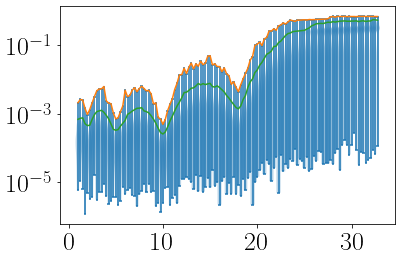

In [224]:
plt.violinplot(1-matches_self.T, qs);
plt.plot(qs, np.max(1-matches_self,1))
plt.plot(qs, np.percentile(1-matches_self,90,1))
plt.yscale('log')

In [225]:
# i_self_err = IUS(qs, 1-np.min(matches_self, 1))
# i_self_err = IUS(qs, np.percentile(1-matches_self, 90, 1)) # 90th%
i_self_err = IUS(qs, np.percentile(1-matches_self, 50, 1)) # 50th%

In [226]:
np.min(matches_self, 1)

array([0.99792421, 0.99740687, 0.99750022, 0.99858508, 0.99906148,
       0.99869241, 0.9979413 , 0.99683916, 0.9953249 , 0.9947499 ,
       0.99469574, 0.99379092, 0.99763956, 0.99797435, 0.99805735,
       0.99896277, 0.99929961, 0.99925339, 0.99887039, 0.99832943,
       0.99516659, 0.99688   , 0.9965761 , 0.995174  , 0.99425733,
       0.99563905, 0.99458189, 0.99367305, 0.99457747, 0.99536907,
       0.99520392, 0.99621036, 0.99807894, 0.99794109, 0.99922478,
       0.99931221, 0.99951475, 0.99933309, 0.99878731, 0.99813833,
       0.99727851, 0.99493389, 0.99229465, 0.98638775, 0.98618732,
       0.97864241, 0.98511912, 0.97747216, 0.96979682, 0.97962728,
       0.97128225, 0.97562848, 0.96544616, 0.97295198, 0.96988724,
       0.95209884, 0.95023985, 0.97327315, 0.97111037, 0.97610756,
       0.9760861 , 0.98310199, 0.97809291, 0.98542411, 0.98701484,
       0.99277257, 0.99142337, 0.99412917, 0.99563697, 0.99300592,
       0.98949779, 0.98494509, 0.97882668, 0.96299325, 0.95312

In [227]:
train_err_bar_data.shape

(6, 6)

In [228]:
train_err_bar_data

q       min    median       max     lower     upper
0   1.0  0.000147  0.000149  0.000878  0.000002  0.000729
1   2.0  0.000404  0.000416  0.001723  0.000012  0.001307
2   5.0  0.000165  0.000256  0.000977  0.000091  0.000721
3   6.0  0.000136  0.000569  0.001003  0.000434  0.000434
4  10.0  0.000097  0.000367  0.000843  0.000270  0.000477
5  18.0  0.000611  0.000690  0.000745  0.000079  0.000055

In [229]:
plt.figure(figsize=(14, 6), dpi=100)
plt.plot(train_err_bar_data['q'], train_err_bar_data['max'], 'o-C0', label='true model error [TRAIN]')
plt.plot(train_err_bar_data['q'], i_self_err(train_err_bar_data['q']), 'o--C0', label='estimated model error [TRAIN]')

plt.plot(test_err_bar_data['q'], test_err_bar_data['max'], 'o-C1', label='true model error [TEST]')
plt.plot(test_err_bar_data['q'], i_self_err(test_err_bar_data['q']), 'o--C1', label='estimated model error [TEST]')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.yscale('log')
plt.xscale('log')
plt.grid()

In [230]:
# if i say the error is 10 and the true error is 1 then i am greatly over-estimating the error and am therefore being under-confident

# true/est < 1


# if i say the error is 1 and the true error is 10 then i am greatly under-estimating the error and am therefore being over-confident

# true/est > 1


In [231]:
# mismatch under-confidence if < 1 ?
# mismatch over-confidence if > 1
train_err_bar_data['max']/i_self_err(train_err_bar_data['q'])

0     3.303342
1    12.573797
2     7.103226
3     4.341728
4     9.818304
5     2.201501
Name: max, dtype: float64

In [232]:
train_err_bar_data['min']/i_self_err(train_err_bar_data['q'])

0    0.553911
1    2.949692
2    1.200473
3    0.587445
4    1.131716
5    1.807700
Name: min, dtype: float64

In [233]:
train_err_bar_data['median']/i_self_err(train_err_bar_data['q'])

0    0.560114
1    3.037926
2    1.862856
3    2.464587
4    4.270997
5    2.039870
Name: median, dtype: float64

In [234]:
# mismatch under-confidence if < 1 ?
# mismatch over-confidence if > 1
test_err_bar_data['max']/i_self_err(test_err_bar_data['q'])

0      0.854322
1      4.430708
2      3.089610
3      1.695829
4      3.244114
5      6.095707
6      3.375909
7     11.478052
8     10.158948
9     11.385920
10     8.525348
11     2.501903
12     8.141821
13     5.909859
14     5.812859
15     0.215986
16     1.555327
17     0.279262
18     0.966645
Name: max, dtype: float64

In [235]:
test_err_bar_data['median']

0     0.000281
1     0.001473
2     0.001042
3     0.000571
4     0.000994
5     0.001311
6     0.000626
7     0.001584
8     0.001731
9     0.002107
10    0.001808
11    0.000570
12    0.002059
13    0.002283
14    0.001248
15    0.000077
16    0.000349
17    0.000287
18    0.297478
Name: median, dtype: float64

In [236]:
i_self_err(test_err_bar_data['q'])

array([3.29401125e-04, 3.32532244e-04, 3.37308757e-04, 3.36569135e-04,
       3.06339405e-04, 2.15031246e-04, 1.85449768e-04, 1.37973387e-04,
       1.70424076e-04, 1.85039880e-04, 2.12108673e-04, 2.27815607e-04,
       2.52879018e-04, 3.86314571e-04, 2.97225517e-04, 3.58227815e-04,
       3.56466630e-04, 1.29091135e-03, 3.10893922e-01])

In [237]:
v=train_err_bar_data['median']/i_self_err(train_err_bar_data['q'])
l=train_err_bar_data['min']/i_self_err(train_err_bar_data['q'])
u=train_err_bar_data['max']/i_self_err(train_err_bar_data['q'])
df_cal_data_train = pd.DataFrame({'q':train_err_bar_data['q'], 'y':v,  'lower':v-l, 'upper':u-v})

In [238]:
v=test_err_bar_data['median']/i_self_err(test_err_bar_data['q'])
l=test_err_bar_data['min']/i_self_err(test_err_bar_data['q'])
u=test_err_bar_data['max']/i_self_err(test_err_bar_data['q'])
df_cal_data_test = pd.DataFrame({'q':test_err_bar_data['q'], 'y':v,  'lower':v-l, 'upper':u-v})

In [239]:
df_cal_data_train

q         y     lower     upper
0   1.0  0.560114  0.006204  2.743228
1   2.0  3.037926  0.088234  9.535871
2   5.0  1.862856  0.662383  5.240370
3   6.0  2.464587  1.877142  1.877142
4  10.0  4.270997  3.139281  5.547307
5  18.0  2.039870  0.232170  0.161632

In [240]:
df_cal_data_train['1/y'] = df_cal_data_train.apply(lambda x: 1/x['y'],1)
df_cal_data_train['1/y']

0    1.785350
1    0.329172
2    0.536810
3    0.405748
4    0.234137
5    0.490227
Name: 1/y, dtype: float64

In [241]:
df_cal_data_test

q          y     lower     upper
0    1.18   0.854322  0.000000  0.000000
1    1.20   4.430708  0.000000  0.000000
2    1.25   3.089610  0.000000  0.000000
3    1.33   1.695829  0.000000  0.000000
4    1.50   3.244114  0.000000  0.000000
5    1.75   6.095707  0.000000  0.000000
6    1.82   3.375909  0.000000  0.000000
7    2.05  11.478052  0.000000  0.000000
8    2.20  10.158948  0.000000  0.000000
9    2.25  11.385920  0.000000  0.000000
10   2.35   8.525348  0.000000  0.000000
11   2.41   2.501903  0.000000  0.000000
12   2.50   8.141821  0.000000  0.000000
13   3.00   5.909859  0.000000  0.000000
14   4.00   4.199970  3.069022  1.612889
15   7.00   0.215986  0.000000  0.000000
16   8.00   0.978898  0.531284  0.576429
17  15.00   0.222642  0.056620  0.056620
18  32.00   0.956847  0.009799  0.009799

In [242]:
df_cal_data_test['1/y'] = df_cal_data_test.apply(lambda x: 1/x['y'],1)

In [243]:
df_cal_data_test

q          y     lower     upper       1/y
0    1.18   0.854322  0.000000  0.000000  1.170519
1    1.20   4.430708  0.000000  0.000000  0.225698
2    1.25   3.089610  0.000000  0.000000  0.323665
3    1.33   1.695829  0.000000  0.000000  0.589682
4    1.50   3.244114  0.000000  0.000000  0.308251
5    1.75   6.095707  0.000000  0.000000  0.164050
6    1.82   3.375909  0.000000  0.000000  0.296216
7    2.05  11.478052  0.000000  0.000000  0.087123
8    2.20  10.158948  0.000000  0.000000  0.098435
9    2.25  11.385920  0.000000  0.000000  0.087828
10   2.35   8.525348  0.000000  0.000000  0.117297
11   2.41   2.501903  0.000000  0.000000  0.399696
12   2.50   8.141821  0.000000  0.000000  0.122823
13   3.00   5.909859  0.000000  0.000000  0.169209
14   4.00   4.199970  3.069022  1.612889  0.238097
15   7.00   0.215986  0.000000  0.000000  4.629940
16   8.00   0.978898  0.531284  0.576429  1.021557
17  15.00   0.222642  0.056620  0.056620  4.491515
18  32.00   0.956847  0.009799  0.009799  1.045100

currently using 50% to compute this


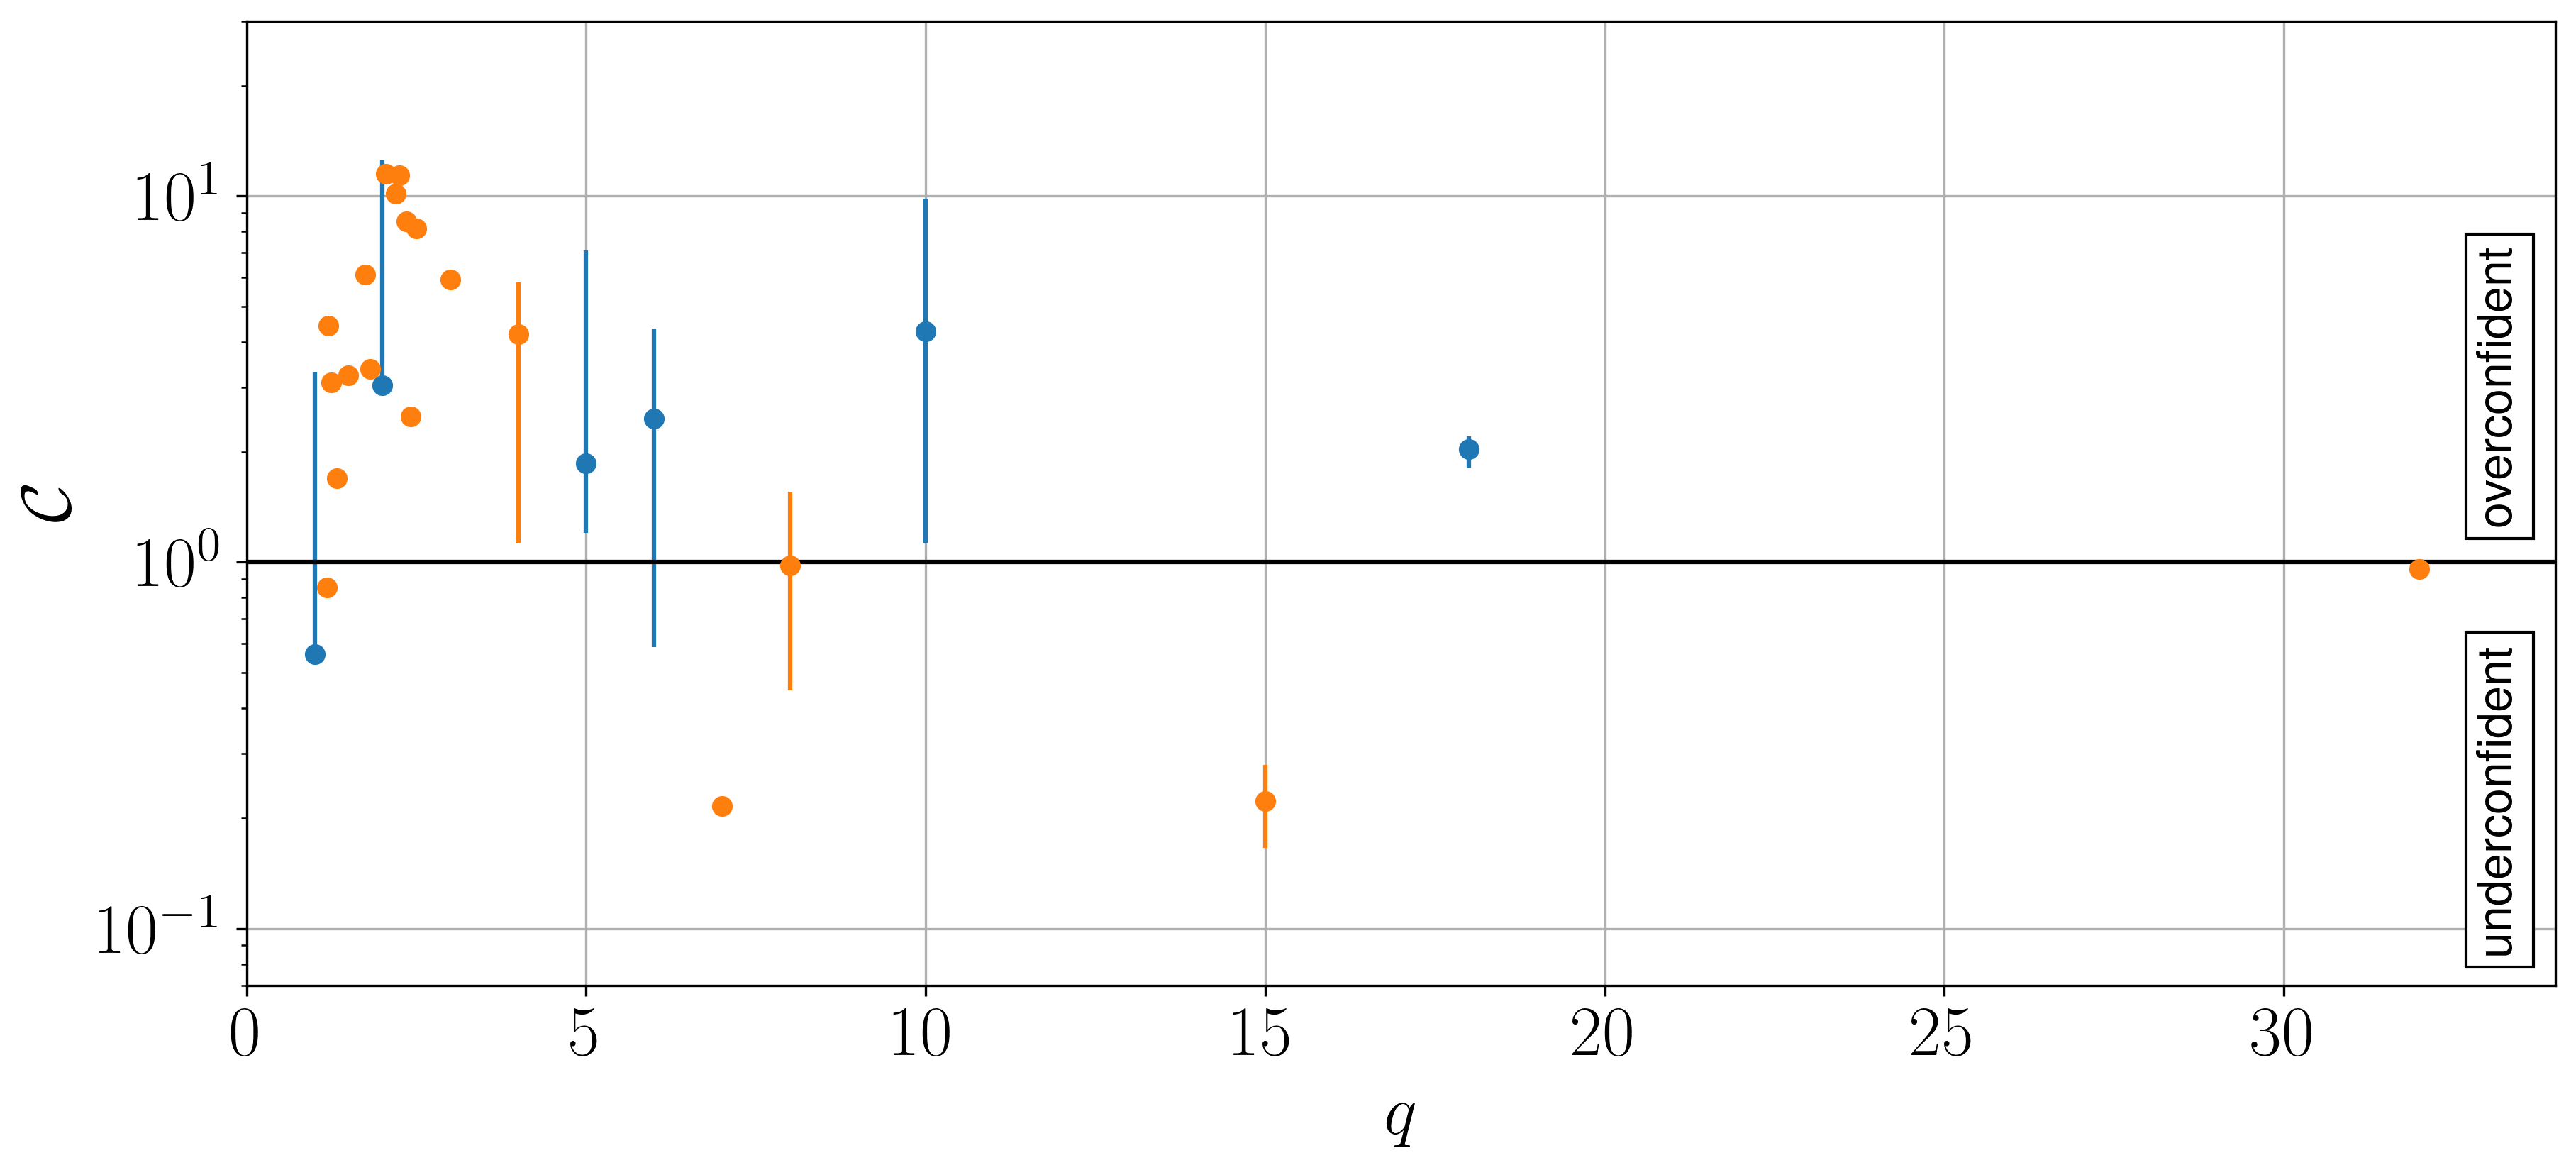

In [244]:
plt.rcParams.update({'font.size':24})
plt.figure(figsize=(14, 6), dpi=300)
plt.errorbar(df_cal_data_train['q'], df_cal_data_train['y'], yerr=[df_cal_data_train['lower'], df_cal_data_train['upper']], fmt='oC0', label='train')
plt.errorbar(df_cal_data_test['q'], df_cal_data_test['y'], yerr=[df_cal_data_test['lower'], df_cal_data_test['upper']], fmt='oC1', label='test')
plt.axhline(1, c='k')



# plt.xscale('log')
plt.yscale('log')
plt.ylabel(r"$\mathcal{C}$")
plt.xlabel(r"$q$")
# plt.title("Model Calibration")
plt.text(33.5, 1.33, 'overconfident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right', rotation=90, fontsize=16)
plt.text(33.5, 0.09, 'underconfident', bbox=dict(facecolor='w', alpha=1.), horizontalalignment='right', rotation=90, fontsize=16)

plt.xlim(0, 34)
# plt.ylim(1e-2, 12)
# plt.ylim(0.02, 12)
plt.ylim(7e-2, 3e1)

# plt.annotate("", xy=(31, 2.), xycoords='data', xytext=(31, 1.3), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
# plt.annotate("", xy=(31, 0.2), xycoords='data', xytext=(31, 0.8), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
# plt.legend(loc='lower left', fontsize=16, ncol=2)
plt.grid()

# ax = plt.gca()
# ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))


# https://stackoverflow.com/questions/14530113/set-ticks-with-logarithmic-scale
# ax1 = plt.gca()
# ax1.set_yticks([0.058, 0.1, 1, 5, 10])
# ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/calibration_plot.png", bbox_inches='tight')

print("currently using 50% to compute this")

In [245]:
# under-confident: samples from GPM are more varied
# over-confident: samples from GPM are less varied

In [246]:
# confidence score: ratio between True error estiamte and self-error estimate

# plots for paper

## comparing q = 4, 8, 15, 32

In [285]:
plt.rcParams.update({'font.size':16})

In [248]:
def get_data_for_plot(q, n_samples=100, distance=1e4, add_nr_nr_comparison=False):
    idxs = nr_data['df'].query(f"q == {q}").index
    print(f"q = {q}")

    times_ = nr_data['times']
    nr_strain_0 = nr_data['strains'][idxs[0]]
    nr_strain_other = nr_data['strains'][idxs[1:]]
    delta_t = 1/4096.
    Mtotal = 100
    t_nr_start = -800
    
    # high_frequency_cutoff = 40
    high_frequency_cutoff = None

    hp_gpm_bar, hc_gpm_bar = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=-1,
        distance=distance,
    )

    hp_gpm_samples, hc_gpm_samples = gpm.generate_pycbc_hp_hc(
        q=q,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        n_samples=n_samples,
        distance=distance,
    )

    hp_nr, hc_nr = analysis_utils.get_nr_strain(
        q=q,
        strain=nr_strain_0,
        times=times_,
        M=Mtotal,
        delta_t=delta_t,
        t_nr_start=t_nr_start,
        distance=distance,
    )


    # compare the mean model prediction with one of the NR waveforms
    matches_bar, hp1s_bar, hc1s_bar, hp2, hc2 = compare_waveforms(hp_gpm_bar, hc_gpm_bar, hp_nr, hc_nr, high_frequency_cutoff=high_frequency_cutoff)

    # compare samples from the model with one of the NR waveforms
    matches, hp1s, hc1s, _, _ = compare_waveforms(hp_gpm_samples, hc_gpm_samples, hp_nr, hc_nr, high_frequency_cutoff=high_frequency_cutoff)
    
    
    if add_nr_nr_comparison == True:
        hp_nr_others = []
        hc_nr_others = []
        for i in range(len(idxs[1:])):
            hp_nr_other_, hc_nr_other_ = analysis_utils.get_nr_strain(
                q=q,
                strain=nr_strain_other[i],
                times=times_,
                M=Mtotal,
                delta_t=delta_t,
                t_nr_start=t_nr_start,
                distance=distance,
            )
            hp_nr_others.append(hp_nr_other_)
            hc_nr_others.append(hc_nr_other_)

        # compare a reference NR with the other NR simulations at the same mass-ratio:

        matches_nr_nr, hp1s_nr_nr, hc1s_nr_nr, hp2_nr_nr, hc2_nr_nr = compare_waveforms(hp_nr_others, hc_nr_others, hp_nr, hc_nr, high_frequency_cutoff=high_frequency_cutoff)
        return hp1s_bar, hc1s_bar, hp2, hc2, hp1s, hc1s, hp1s_nr_nr, hc1s_nr_nr

    else:
        return hp1s_bar, hc1s_bar, hp2, hc2, hp1s, hc1s

In [249]:
q4_data = {}
q4_data['hp1s_bar'], q4_data['hc1s_bar'], q4_data['hp2'], q4_data['hc2'], q4_data['hp1s'], q4_data['hc1s'] = get_data_for_plot(q=4, n_samples=n_samples)

q = 4


In [250]:
q8_data = {}
q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'] = get_data_for_plot(q=8, n_samples=n_samples)

q = 8


In [251]:
q15_data = {}
q15_data['hp1s_bar'], q15_data['hc1s_bar'], q15_data['hp2'], q15_data['hc2'], q15_data['hp1s'], q15_data['hc1s'] = get_data_for_plot(q=15, n_samples=n_samples)

q = 15


In [252]:
q32_data = {}
q32_data['hp1s_bar'], q32_data['hc1s_bar'], q32_data['hp2'], q32_data['hc2'], q32_data['hp1s'], q32_data['hc1s'] = get_data_for_plot(q=32, n_samples=n_samples)

q = 32


In [253]:
times_M.shape

(1757,)

In [254]:
t_ = phenom.StoM(q4_data['hp1s_bar'][0].sample_times, 100)

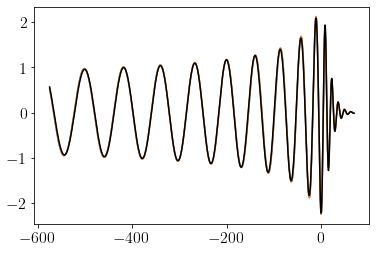

In [255]:
plt.plot(t_, q4_data['hp1s_bar'][0])
plt.plot(t_, q4_data['hp1s'][0])

plt.plot(t_, q4_data['hp2'], c='k')

In [256]:
phenom.StoM(q15_data['hp1s_bar'][0].sample_times, 100).shape

(1303,)

(-100.0, 100.0)

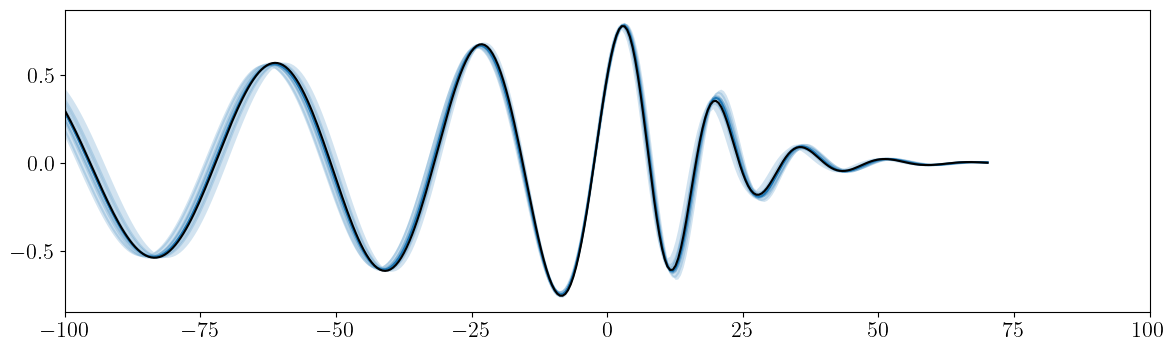

In [257]:
v_samples = np.array([q15_data['hp1s'][i].numpy() for i in range(n_samples)])

plt.figure(figsize=(14,4), dpi=100)
plt.plot(t_, q15_data['hp1s_bar'][0])

plt.plot(t_, v_samples[0], color='C0', alpha=0.2)
plt.plot(t_, v_samples[1:10].T, color='C0', alpha=0.2)

plt.fill_between(t_, y1=v_samples.min(0), y2=v_samples.max(0), alpha=0.2)
plt.plot(t_, q15_data['hp2'], c='k')

plt.xlim(-100,100)

In [258]:
v4_samples = np.array([q4_data['hp1s'][i].numpy() for i in range(n_samples)])
v8_samples = np.array([q8_data['hp1s'][i].numpy() for i in range(n_samples)])
v15_samples = np.array([q15_data['hp1s'][i].numpy() for i in range(n_samples)])
v32_samples = np.array([q32_data['hp1s'][i].numpy() for i in range(n_samples)])

In [259]:




# fig = plt.figure(figsize=(14,8), dpi=100)

# gs = GridSpec(2, 3, figure=fig, wspace=0.0, hspace=0.0)

# ax00 = fig.add_subplot(gs[0, :2])
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=0.2)
# plt.plot(times_M, q4_data['hp2'], c='k')
# plt.xlim(-575, -30)
# plt.xticks([])

# ax01 = fig.add_subplot(gs[0, 2:])
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=0.2)
# plt.plot(times_M, q4_data['hp2'], c='k')
# plt.xlim(-30, 80)
# plt.xticks([])
# plt.yticks([])

# ax10 = fig.add_subplot(gs[1, :2])
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=0.2)
# plt.plot(times_M, q8_data['hp2'], c='k')
# plt.xlim(-575, -30)
# # plt.xticks([])

# ax11 = fig.add_subplot(gs[1, 2:])
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=0.2)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=0.2)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=0.2)
# plt.plot(times_M, q8_data['hp2'], c='k')
# plt.xlim(-30, 80)
# # plt.xticks([])
# plt.yticks([])

# plt.show()

In [260]:
# alpha_l=0.5
# alpha=0.3





# fig = plt.figure(figsize=(14,8), dpi=100)

# gs = GridSpec(2, 3, figure=fig, wspace=0.0, hspace=0.0)

# ax00 = fig.add_subplot(gs[0, :2])
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k')
# plt.xlim(-575, -30)
# plt.xticks([])

# ax01 = fig.add_subplot(gs[0, 2:])
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k')
# plt.xlim(-30, 80)
# plt.xticks([])
# plt.yticks([])

# ax10 = fig.add_subplot(gs[1, :2])
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k')
# plt.xlim(-575, -30)
# # plt.xticks([])

# ax11 = fig.add_subplot(gs[1, 2:])
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k')
# plt.xlim(-30, 80)
# # plt.xticks([])
# plt.yticks([])

# plt.show()

Text(0.06, 0.5, '$h_+(t)$')

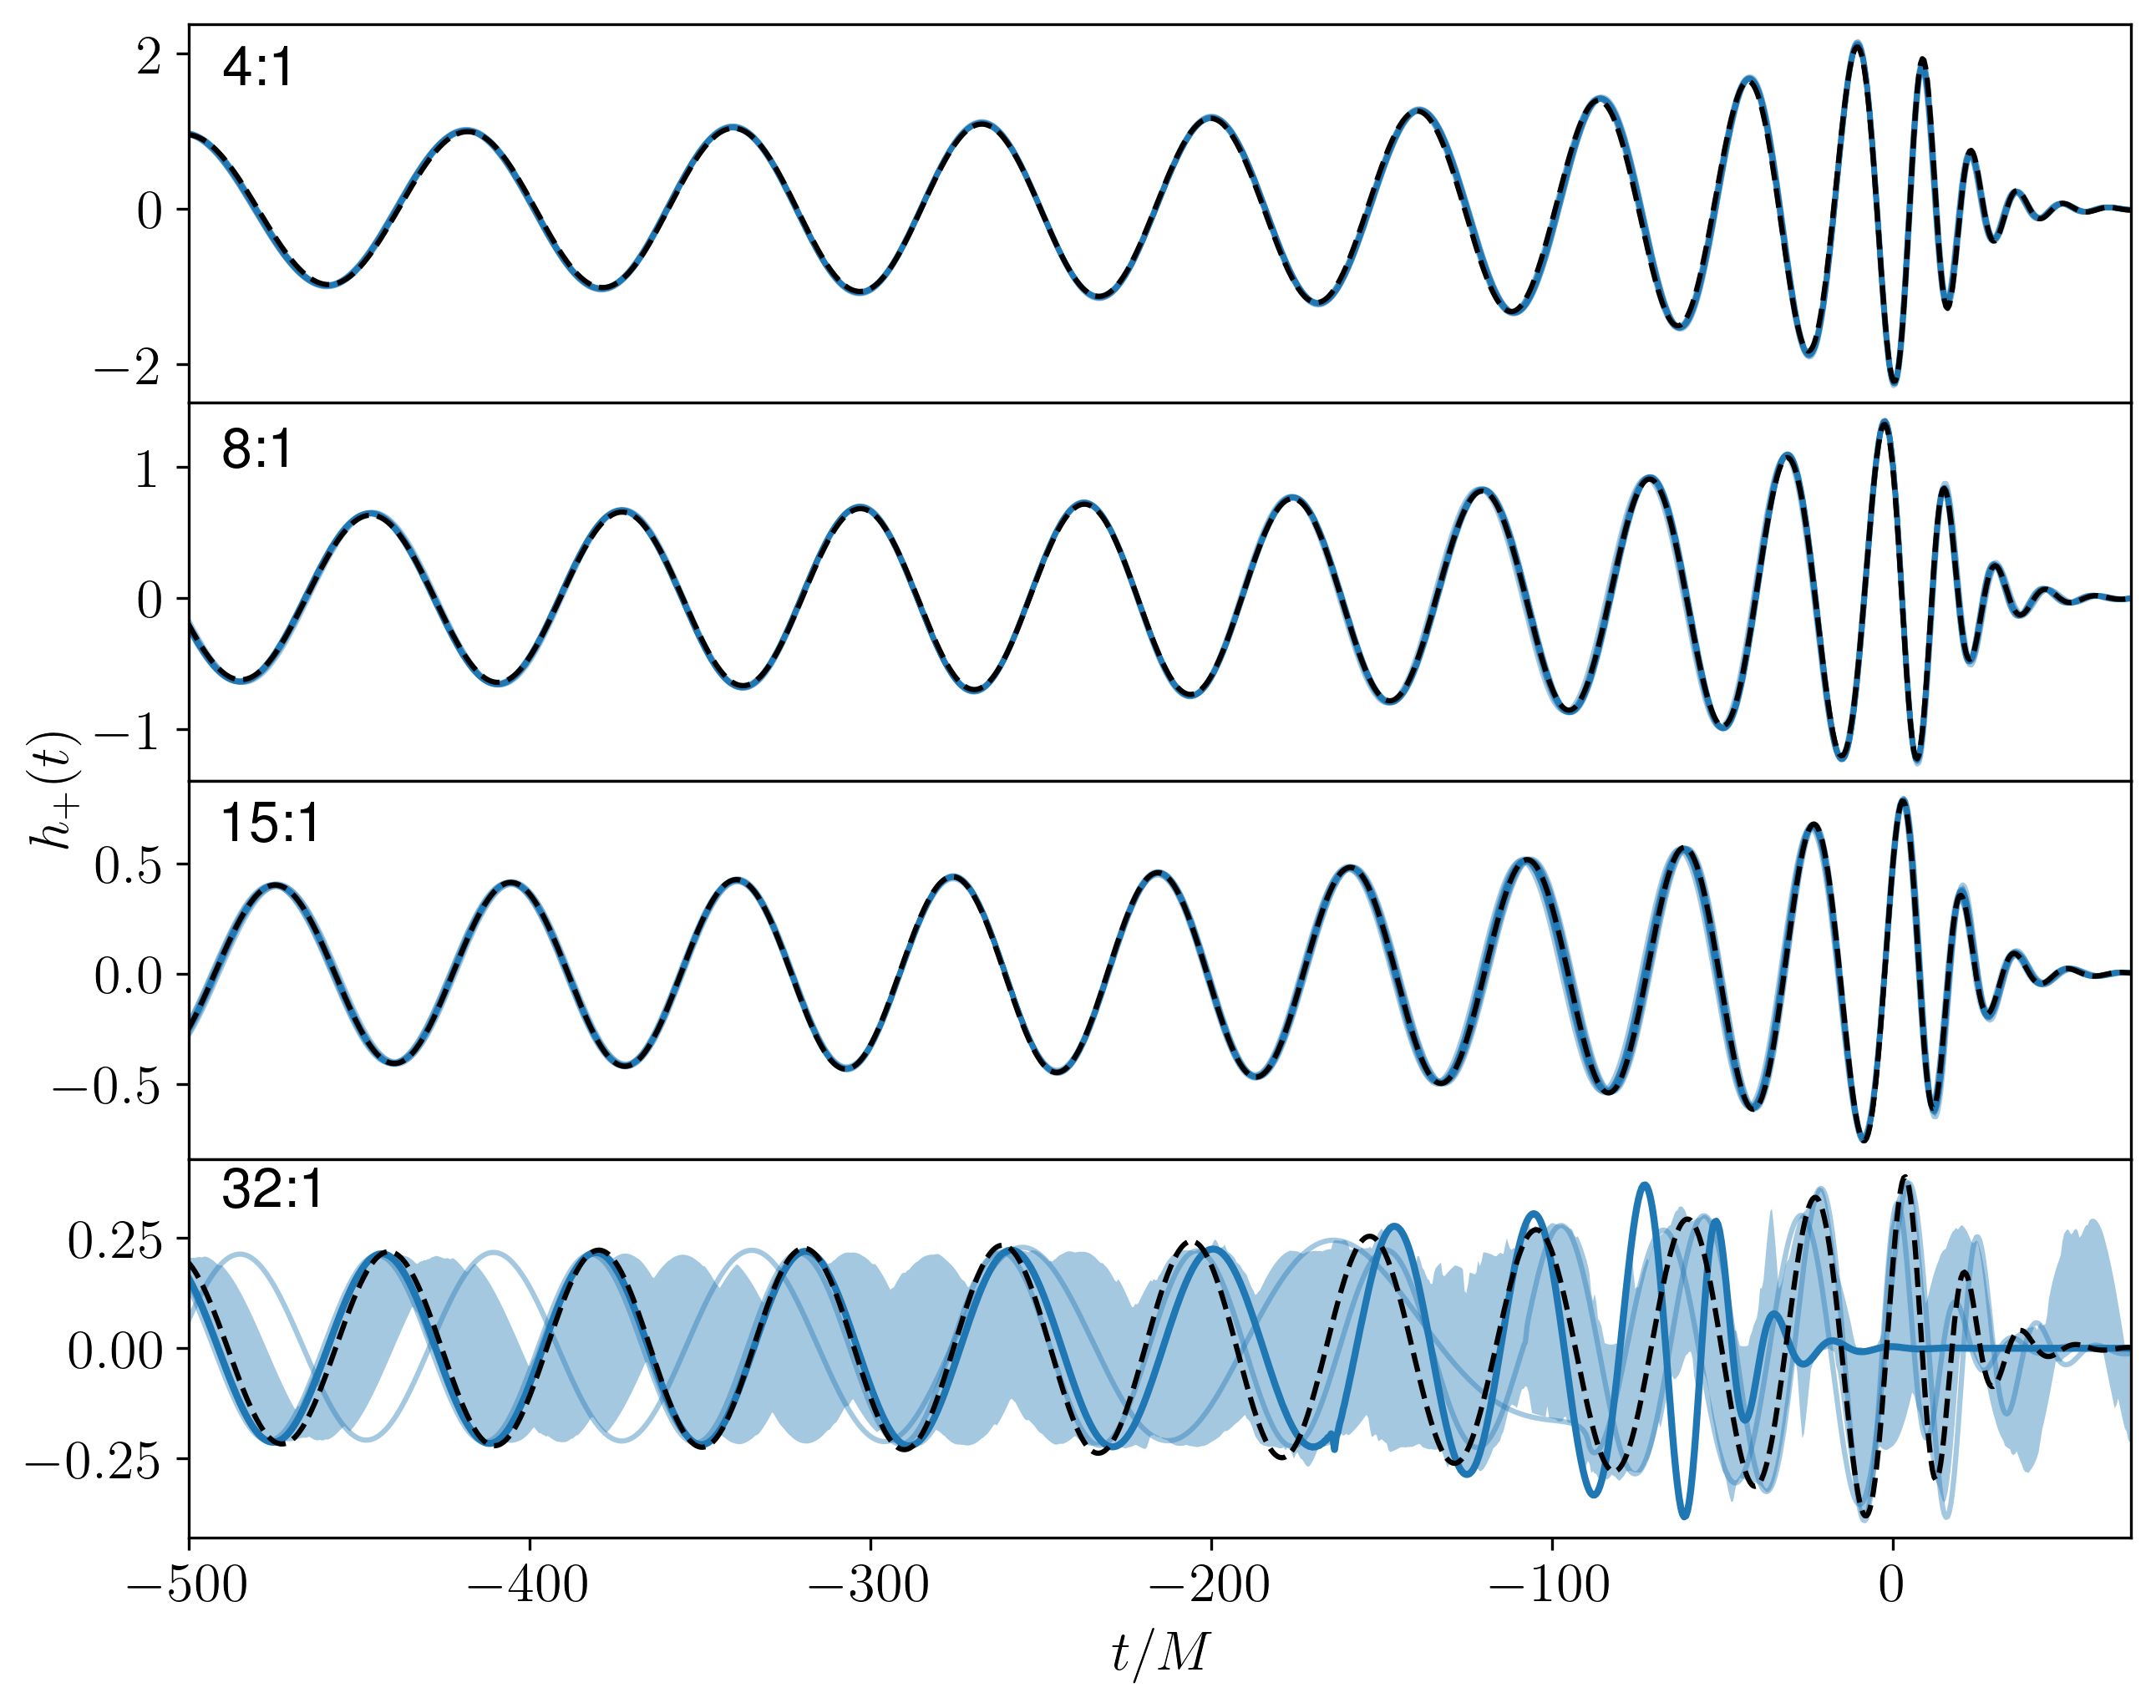

In [291]:
alpha=0.4
alpha_l=0.4
xlims=[-500, 70]
# xlims=[-100, 70]
fig=plt.figure(figsize=(10,8), dpi=300)
plt.subplots_adjust(hspace=(0))
plt.subplot(4, 1, 1)


plt.plot(t_, q4_data['hp1s_bar'][0])
plt.plot(t_, v4_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v4_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(t_, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=alpha)
plt.fill_between(t_, y1=np.percentile(v4_samples, 95, 0), y2=np.percentile(v4_samples, 5, 0), alpha=alpha)
plt.plot(t_, q4_data['hp2'], c='k', ls='--', label='q4')
plt.text(-490, 1.6, "4:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 2)
plt.plot(t_, q8_data['hp1s_bar'][0])
plt.plot(t_, v8_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v8_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(t_, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=alpha)
plt.fill_between(t_, y1=np.percentile(v8_samples, 95, 0), y2=np.percentile(v8_samples, 5, 0), alpha=alpha)
plt.plot(t_, q8_data['hp2'], c='k', ls='--', label='q8')
plt.text(-490, 1, "8:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 3)
plt.plot(t_, q15_data['hp1s_bar'][0])
plt.plot(t_, v15_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(t_, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
plt.fill_between(t_, y1=np.percentile(v15_samples, 95, 0), y2=np.percentile(v15_samples, 5, 0), alpha=alpha)
plt.plot(t_, q15_data['hp2'], c='k', ls='--', label='q15')
plt.text(-490, 0.6, "15:1")
plt.xlim(*xlims)
plt.xticks([])
# plt.legend(loc='upper left', fontsize=10)
plt.subplot(4, 1, 4)
plt.plot(t_, q32_data['hp1s_bar'][0], lw=2)
plt.plot(t_, v32_samples[0], color='C0', alpha=alpha_l)
plt.plot(t_, v32_samples[1:2].T, color='C0', alpha=alpha_l)
# plt.fill_between(t_, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
plt.fill_between(t_, y1=np.percentile(v32_samples, 95, 0), y2=np.percentile(v32_samples, 5, 0), alpha=alpha)
# plt.fill_between(t_, y1=np.percentile(v32_samples, 80, 0), y2=np.percentile(v32_samples, 20, 0), alpha=alpha)
plt.plot(t_, q32_data['hp2'], c='k', ls='--', label='q32')
plt.text(-490, 0.32, "32:1")
plt.xlim(*xlims)
# plt.legend(loc='upper left', fontsize=10)
plt.xlabel("$t/M$")
fig.text(0.06, 0.5, r'$h_+(t)$', va='center', rotation='vertical')

# fig.supylabel()
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_plot.png", bbox_inches = 'tight')
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_plot.png")

# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_plot.png")

In [262]:
# alpha=0.4
# alpha_l=0.4
# xlims=[-100, 70]
# plt.figure(figsize=(6,8), dpi=300)
# plt.subplots_adjust(hspace=(0))
# plt.subplot(4, 1, 1)
# plt.plot(times_M, q4_data['hp1s_bar'][0])
# plt.plot(times_M, v4_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v4_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v4_samples.min(0), y2=v4_samples.max(0), alpha=alpha)
# plt.plot(times_M, q4_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 2)
# plt.plot(times_M, q8_data['hp1s_bar'][0])
# plt.plot(times_M, v8_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v8_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v8_samples.min(0), y2=v8_samples.max(0), alpha=alpha)
# plt.plot(times_M, q8_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 3)
# plt.plot(times_M, q15_data['hp1s_bar'][0])
# plt.plot(times_M, v15_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v15_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v15_samples.min(0), y2=v15_samples.max(0), alpha=alpha)
# plt.plot(times_M, q15_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)
# plt.xticks([])
# plt.subplot(4, 1, 4)
# plt.plot(times_M, q32_data['hp1s_bar'][0])
# plt.plot(times_M, v32_samples[0], color='C0', alpha=alpha_l)
# plt.plot(times_M, v32_samples[1:10].T, color='C0', alpha=alpha_l)
# plt.fill_between(times_M, y1=v32_samples.min(0), y2=v32_samples.max(0), alpha=alpha)
# plt.plot(times_M, q32_data['hp2'], c='k', ls='--')
# plt.xlim(*xlims)

# opening plot

In [263]:
nr_data['df'].query(f"q == 4")

name    q    fring     fdamp  duration  t_final  \
1        q4a0_T_96_384  4.0  0.07433  0.014004    2202.1    229.5   
5        q4a0_T_80_320  4.0  0.07433  0.014004    2199.5    689.1   
9       q4a0_T_112_448  4.0  0.07433  0.014004    2202.5    151.8   
11   SXS_BBH_0167_Res5  4.0  0.07433  0.014004    3115.7    404.1   
14   SXS_BBH_0167_Res3  4.0  0.07433  0.014004    2874.0    403.8   
28  RIT-eBBH-1133-n100  4.0  0.07433  0.014004    2143.1    712.8   
44              GT0454  4.0  0.07433  0.014004    1855.1    495.1   

    start_freq_100Msun   set  has_dup                      tag  
1            21.017192  test     True       q4.0_q4a0_T_96_384  
5            20.716335  test     True       q4.0_q4a0_T_80_320  
9            20.892015  test     True      q4.0_q4a0_T_112_448  
11           20.834667  test     True   q4.0_SXS_BBH_0167_Res5  
14           20.826849  test     True   q4.0_SXS_BBH_0167_Res3  
28           20.749856  test     True  q4.0_RIT-eBBH-1133-n100  
44           20.814909  test     True              q4.0_GT0454

In [264]:
# q8_data = {}
# q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=4, n_samples=n_samples, add_nr_nr_comparison=True)


q8_data = {}
q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=8, n_samples=n_samples, add_nr_nr_comparison=True)



# q8_data = {}
# q8_data['hp1s_bar'], q8_data['hc1s_bar'], q8_data['hp2'], q8_data['hc2'], q8_data['hp1s'], q8_data['hc1s'], q8_data['hp1s_nr_nr'], q8_data['hc1s_nr_nr'] = get_data_for_plot(q=15, n_samples=n_samples, add_nr_nr_comparison=True)

q = 8


In [265]:
m_bar = analysis_utils.compute_match(q8_data['hp1s_bar'][0], q8_data['hp2'], f_low=25)

In [266]:
m_samples = np.array([analysis_utils.compute_match(q8_data['hp1s'][i], q8_data['hp2'], f_low=25) for i in range(len(q8_data['hp1s']))])

In [267]:
m_bar

0.9996508875501976

In [268]:
m_5 = np.percentile(m_samples, 5)
m_5

0.9972158425053866

In [269]:
m_95 = np.percentile(m_samples, 95)
m_95

0.9999209768366268

In [270]:
m_lower = m_bar-m_5
m_lower

0.0024350450448109573

In [271]:
m_bar - m_lower

0.9972158425053866

In [272]:
m_upper = m_95-m_bar
m_upper

0.00027008928642924257

In [273]:
m_bar + m_upper

0.9999209768366268

In [274]:
print(rf"$M = {m_bar:.3f}_{m_5:.3f}^{m_95:.3f}$")

$M = 1.000_0.997^1.000$


In [275]:
h_bar = q8_data['hp1s_bar'][0].numpy()

h_samples = np.array([q8_data['hp1s'][i].numpy() for i in range(n_samples)])

h_nr = q8_data['hp2'].numpy()

h_nr_other = np.array([q8_data['hp1s_nr_nr'][i].numpy() for i in range(len(q8_data['hc1s_nr_nr']))])

In [276]:
t_ = phenom.StoM(q8_data['hp1s_bar'][0].sample_times, 100)

Text(0.5, 1.0, '$M = {0.99965}_{0.99722}^{0.99992}$')

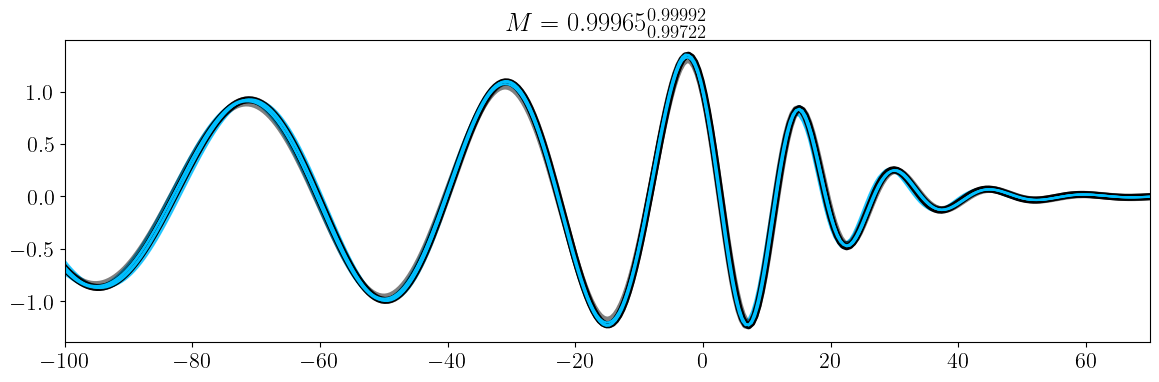

In [277]:
plt.figure(figsize=(14, 4), dpi=100)
plt.plot(t_, h_bar, lw=5, c='k')
plt.plot(t_, h_nr_other.T, ls='-', c='k', alpha=0.5, lw=5)
plt.plot(t_, h_nr, color='deepskyblue')
plt.plot(t_, h_samples[0], color='deepskyblue')
plt.plot(t_, h_samples[1:3].T, color='deepskyblue')
plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color='deepskyblue', alpha=0.8);


plt.xlim(-100, 70)

plt.title(rf"$M = {{{m_bar:.5f}}}_{{{m_5:.5f}}}^{{{m_95:.5f}}}$")

In [278]:
phi_bar = pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s_bar'][0], q8_data['hc1s_bar'][0])

phi_samples = [pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s'][i], q8_data['hc1s'][i]) for i in range(n_samples)]
phi_samples = np.array([phi_samples[i].numpy() for i in range(n_samples)])

phi_nr = pycbc.waveform.utils.phase_from_polarizations(q8_data['hp2'], q8_data['hc2'])

phi_nr_other = [pycbc.waveform.utils.phase_from_polarizations(q8_data['hp1s_nr_nr'][i], q8_data['hc1s_nr_nr'][i]) for i in range(len(q8_data['hc1s_nr_nr']))]
phi_nr_other = np.array([phi_nr_other[i].numpy() for i in range(len(phi_nr_other))])

In [279]:
phi_diff_nr_bar = phi_nr-phi_bar
phi_diff_nr_samples = (phi_nr.numpy()-phi_samples)
phi_diff_nr_nr = (phi_nr.numpy()-phi_nr_other)

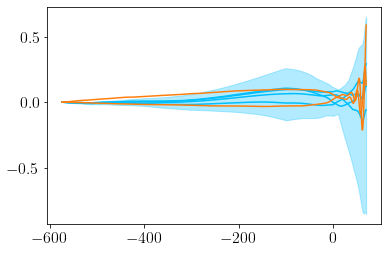

In [280]:
plt.figure()

plt.plot(t_, phi_diff_nr_bar, color='deepskyblue')
plt.plot(t_, phi_diff_nr_samples[0], color='deepskyblue')
plt.plot(t_, phi_diff_nr_samples[1:3].T, color='deepskyblue')
plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='deepskyblue', alpha=0.3);
plt.plot(t_, phi_diff_nr_nr.T, c='C1')

# plt.xlim(-100, 100)

In [281]:
# fig = plt.figure(figsize=(6,4), dpi=200)
# fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
gs = GridSpec(3, 1, figure=fig, wspace=0.0, hspace=0.)
ax0 = fig.add_subplot(gs[:2, 0])
plt.plot(t_, h_nr, lw=2, color='k')
# plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
plt.plot(t_, h_bar, c='r', ls='--', lw=1)
# plt.plot(times_M, h_samples[0], color='deepskyblue',  alpha=0.3, ls='--')
# plt.plot(times_M, h_samples[1:3].T, color='deepskyblue',  alpha=0.3, ls='--')
plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color='r', alpha=0.3);
plt.xlim(-570, 70)
plt.xticks([])
plt.ylabel(r'$h_+(t)$')

plt.text(-560, 1.2, rf"$Match = {{{m_bar:.5f}}}_{{\,\,{m_5:.5f}}}^{{\,\,{m_95:.5f}}}$");

ax1 = fig.add_subplot(gs[2:, 0])
plt.plot(t_, phi_diff_nr_nr.T, c='k')
plt.plot(t_, phi_diff_nr_bar, color='r', lw=2, ls='--')
plt.plot(t_, phi_diff_nr_samples[0], color='r', alpha=0.3, ls='-')
plt.plot(t_, phi_diff_nr_samples[3:5].T, color='r', alpha=0.3, ls='-')
plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color='r', alpha=0.3);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 5, 0), y2=np.percentile(phi_diff_nr_samples, 95, 0), color='r', alpha=0.3);
# plt.fill_between(t_, y1=np.percentile(phi_diff_nr_samples, 1, 0), y2=np.percentile(phi_diff_nr_samples, 99, 0), color='r', alpha=0.4);


plt.xlim(-570, 70)
plt.ylim(-0.59,0.52)
plt.ylabel(r'$\Delta \phi (t)$')
fig.supxlabel("$t/M$")




# plt.savefig("/Users/sebastian.khan/Desktop/waveform_and_phase.png", bbox_inches = 'tight')
# plt.savefig("/Users/sebastian.khan/Desktop/waveform_and_phase.png")

# plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")

Text(0.5, 0.01, '$t/M$')

In [282]:
# col='deepskyblue'
# fig = plt.figure(figsize=(6*1.5,4*1.5), dpi=200)
# gs = GridSpec(3, 3, figure=fig, wspace=0.0, hspace=0.)
# ax0 = fig.add_subplot(gs[:2, :2])
# plt.plot(t_, h_nr, lw=2, color='k')
# # plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
# plt.plot(t_, h_bar, c=col, ls='--', lw=1)
# plt.plot(t_, h_samples[0], color=col,  alpha=0.3, ls='--')
# plt.plot(t_, h_samples[1:3].T, color=col,  alpha=0.3, ls='--')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color=col, alpha=0.5);
# # plt.xlim(-600, -10)
# plt.xticks([])
# plt.ylabel(r'$h_+(t)$')

# ax1 = fig.add_subplot(gs[2:, :2])
# plt.plot(t_, phi_diff_nr_nr.T, c='k')
# plt.plot(t_, phi_diff_nr_bar, color=col, ls='--', lw=1)
# plt.plot(t_, phi_diff_nr_samples[0], color=col, alpha=0.5, ls='--')
# plt.plot(t_, phi_diff_nr_samples[1:3].T, color=col, alpha=0.5, ls='--')
# plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color=col, alpha=0.3);

# plt.ylabel(r'$\Delta \phi (t)$')
# # plt.xlim(-600, -10)
# plt.ylim(-0.5,0.5)

# ax2 = fig.add_subplot(gs[:2, 2:])
# plt.plot(t_, h_nr, lw=2, color='k')
# # plt.plot(times_M, h_nr_other.T, ls='-', c='r', alpha=0.5, lw=5)
# plt.plot(t_, h_bar, c=col, ls='--', lw=1)
# plt.plot(t_, h_samples[0], color=col,  alpha=0.3, ls='--')
# plt.plot(t_, h_samples[1:3].T, color=col,  alpha=0.3, ls='--')
# plt.fill_between(t_, y1=h_samples.min(0), y2=h_samples.max(0), color=col, alpha=0.5);
# plt.xlim(-10, 70)
# plt.xticks([])
# plt.yticks([])

# ax3 = fig.add_subplot(gs[2:, 2:])
# plt.plot(t_, phi_diff_nr_nr.T, c='k')
# plt.plot(t_, phi_diff_nr_bar, color=col, ls='--')
# plt.plot(t_, phi_diff_nr_samples[0], color=col, alpha=0.3, ls='--')
# plt.plot(t_, phi_diff_nr_samples[1:3].T, color=col, alpha=0.3, ls='--')
# plt.fill_between(t_, y1=phi_diff_nr_samples.min(0), y2=phi_diff_nr_samples.max(0), color=col, alpha=0.3);
# plt.yticks([])
# plt.xlim(-10, 70)
# plt.ylim(-0.5,0.5)

# fig.supxlabel("$t/M$")
# # plt.savefig("/Users/sebastian.khan/personal/git/stk/phenprob-paper/paper/figs/waveform_and_phase.png")